In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
diabetes=pd.read_csv("diabetes.csv")
diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [5]:
X= diabetes[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']].values
y=diabetes[['Outcome']].values

In [6]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [8]:
print("X_train.shape: " +str(X_train.shape))
print("X_test.shape: " +str(X_test.shape))
print("y_train.shape: " +str(y_train.shape))
print("y_test.shape: " +str(y_test.shape))

X_train.shape: (614, 8)
X_test.shape: (154, 8)
y_train.shape: (614, 1)
y_test.shape: (154, 1)


In [10]:
#Reshape the data (Used with CNN only)

#X=X.values
#X_test=X_test.values
X = X.reshape(768,4,2,1)
X_test = X_test.reshape(154,4,2,1)
#X_test.shape

In [13]:
#CNN: 1 convolution layer - 1 Pooling - MLP 

from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from keras import regularizers
import keras
from sklearn.model_selection import cross_val_score

model_cnn = Sequential()
#step 1 convolution
model_cnn.add(Conv2D(10, kernel_size=(2,2), activation='tanh', input_shape=(4,2,1), data_format = 'channels_last'))
#step 2 pooling
model_cnn.add(MaxPooling2D(pool_size=(2,2), padding='same'))
#step 3 flattening
model_cnn.add(Flatten())
#step 4 full connection
model_cnn.add(Dense(26, input_dim=8, kernel_regularizer=regularizers.l2(0.04), activation='tanh'))
model_cnn.add(Dense(1, kernel_regularizer=regularizers.l2(0.02), activation='tanh'))
# compiling CNN
model_cnn.compile(optimizer='adam', loss='hinge', metrics=['accuracy'])
#train CNN model
model_cnn.fit(X, y, batch_size=32, epochs=500)
loss, accuracy = model_cnn.evaluate(X_test, y_test, batch_size=None, verbose=1)
print("Test Accuracy: {:.4f}".format(accuracy))

Epoch 1/500
24/24 [==============================] - 0s 12ms/step - loss: 1.6623 - accuracy: 0.7031
Epoch 2/500
24/24 [==============================] - 0s 9ms/step - loss: 1.4644 - accuracy: 0.7018
Epoch 3/500
24/24 [==============================] - 0s 9ms/step - loss: 1.3170 - accuracy: 0.7018
Epoch 4/500
24/24 [==============================] - 0s 8ms/step - loss: 1.1978 - accuracy: 0.7083
Epoch 5/500
24/24 [==============================] - 0s 5ms/step - loss: 1.1028 - accuracy: 0.7083
Epoch 6/500
24/24 [==============================] - 0s 8ms/step - loss: 1.0263 - accuracy: 0.7096
Epoch 7/500
24/24 [==============================] - 0s 9ms/step - loss: 0.9604 - accuracy: 0.7096
Epoch 8/500
24/24 [==============================] - 0s 6ms/step - loss: 0.9077 - accuracy: 0.7096
Epoch 9/500
24/24 [==============================] - 0s 9ms/step - loss: 0.8639 - accuracy: 0.7109
Epoch 10/500
24/24 [==============================] - 0s 6ms/step - loss: 0.8273 - accuracy: 0.7135
Epoch 11

Epoch 81/500
24/24 [==============================] - 0s 5ms/step - loss: 0.6177 - accuracy: 0.7383
Epoch 82/500
24/24 [==============================] - 0s 5ms/step - loss: 0.6159 - accuracy: 0.7396
Epoch 83/500
24/24 [==============================] - 0s 4ms/step - loss: 0.6178 - accuracy: 0.7357
Epoch 84/500
24/24 [==============================] - 0s 4ms/step - loss: 0.6151 - accuracy: 0.7331
Epoch 85/500
24/24 [==============================] - 0s 4ms/step - loss: 0.6154 - accuracy: 0.7331
Epoch 86/500
24/24 [==============================] - 0s 4ms/step - loss: 0.6144 - accuracy: 0.7370: 0s - loss: 0.6296 - accuracy: 0.74
Epoch 87/500
24/24 [==============================] - 0s 5ms/step - loss: 0.6147 - accuracy: 0.7344
Epoch 88/500
24/24 [==============================] - 0s 4ms/step - loss: 0.6136 - accuracy: 0.7344
Epoch 89/500
24/24 [==============================] - 0s 5ms/step - loss: 0.6134 - accuracy: 0.7344
Epoch 90/500
24/24 [==============================] - 0s 4ms/ste

24/24 [==============================] - 0s 8ms/step - loss: 0.5855 - accuracy: 0.7539
Epoch 241/500
24/24 [==============================] - 0s 6ms/step - loss: 0.5848 - accuracy: 0.7487
Epoch 242/500
24/24 [==============================] - 0s 6ms/step - loss: 0.5843 - accuracy: 0.7526
Epoch 243/500
24/24 [==============================] - 0s 10ms/step - loss: 0.5833 - accuracy: 0.7474
Epoch 244/500
24/24 [==============================] - 0s 9ms/step - loss: 0.5841 - accuracy: 0.7513
Epoch 245/500
24/24 [==============================] - 0s 8ms/step - loss: 0.5841 - accuracy: 0.7474
Epoch 246/500
24/24 [==============================] - 0s 12ms/step - loss: 0.5841 - accuracy: 0.7513
Epoch 247/500
24/24 [==============================] - 0s 7ms/step - loss: 0.5835 - accuracy: 0.7487
Epoch 248/500
24/24 [==============================] - 0s 6ms/step - loss: 0.5836 - accuracy: 0.7500
Epoch 249/500
24/24 [==============================] - 0s 8ms/step - loss: 0.5832 - accuracy: 0.7513
Ep

Epoch 319/500
24/24 [==============================] - 0s 5ms/step - loss: 0.5785 - accuracy: 0.7526
Epoch 320/500
24/24 [==============================] - 0s 5ms/step - loss: 0.5784 - accuracy: 0.7513
Epoch 321/500
24/24 [==============================] - 0s 6ms/step - loss: 0.5782 - accuracy: 0.7500
Epoch 322/500
24/24 [==============================] - 0s 4ms/step - loss: 0.5786 - accuracy: 0.7513
Epoch 323/500
24/24 [==============================] - 0s 6ms/step - loss: 0.5780 - accuracy: 0.7539
Epoch 324/500
24/24 [==============================] - 0s 7ms/step - loss: 0.5775 - accuracy: 0.7500
Epoch 325/500
24/24 [==============================] - 0s 6ms/step - loss: 0.5772 - accuracy: 0.7513: 0s - loss: 0.5896 - accuracy: 0.
Epoch 326/500
24/24 [==============================] - 0s 6ms/step - loss: 0.5778 - accuracy: 0.7578
Epoch 327/500
24/24 [==============================] - 0s 6ms/step - loss: 0.5769 - accuracy: 0.7500
Epoch 328/500
24/24 [==============================] - 0s

24/24 [==============================] - 0s 4ms/step - loss: 0.5705 - accuracy: 0.7474
Epoch 479/500
24/24 [==============================] - 0s 4ms/step - loss: 0.5720 - accuracy: 0.7526
Epoch 480/500
24/24 [==============================] - 0s 4ms/step - loss: 0.5707 - accuracy: 0.7500
Epoch 481/500
24/24 [==============================] - 0s 5ms/step - loss: 0.5702 - accuracy: 0.7448
Epoch 482/500
24/24 [==============================] - 0s 5ms/step - loss: 0.5703 - accuracy: 0.7461
Epoch 483/500
24/24 [==============================] - 0s 5ms/step - loss: 0.5702 - accuracy: 0.7513
Epoch 484/500
24/24 [==============================] - 0s 4ms/step - loss: 0.5702 - accuracy: 0.7461
Epoch 485/500
24/24 [==============================] - 0s 4ms/step - loss: 0.5707 - accuracy: 0.7474
Epoch 486/500
24/24 [==============================] - 0s 4ms/step - loss: 0.5703 - accuracy: 0.7487
Epoch 487/500
24/24 [==============================] - 0s 4ms/step - loss: 0.5698 - accuracy: 0.7474
Epoc

In [15]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from keras import regularizers
import keras
from sklearn.model_selection import cross_val_score

model_cnn = Sequential()
#step convolution
model_cnn.add(Conv2D(10, kernel_size=(2,2), activation='relu', input_shape=(4,2,1), data_format = 'channels_last'))
#step 2 pooling
model_cnn.add(MaxPooling2D(pool_size=(2,2), padding='same'))
#step 3 flattening
model_cnn.add(Flatten())# partie de MLP
# step 4 full connection
model_cnn.add(Dense(26, input_dim=26, kernel_regularizer=regularizers.l2(0.04), activation='relu'))
model_cnn.add(Dense(1, kernel_regularizer=regularizers.l2(0.02), activation='sigmoid'))
# compiling CNN
model_cnn.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])
#train CNN
model_cnn.fit(X, y, batch_size=70, epochs=3000)

    
loss, accuracy = model_cnn.evaluate(X, y, batch_size=None, verbose=1)
print("Test Accuracy: {:.4f}".format(accuracy))

Epoch 1/3000
11/11 [==============================] - 0s 7ms/step - loss: 1.6420 - accuracy: 0.5130
Epoch 2/3000
11/11 [==============================] - 0s 6ms/step - loss: 1.6191 - accuracy: 0.5651
Epoch 3/3000
11/11 [==============================] - 0s 6ms/step - loss: 1.5973 - accuracy: 0.6055
Epoch 4/3000
11/11 [==============================] - 0s 6ms/step - loss: 1.5765 - accuracy: 0.6393
Epoch 5/3000
11/11 [==============================] - 0s 5ms/step - loss: 1.5566 - accuracy: 0.6562
Epoch 6/3000
11/11 [==============================] - 0s 7ms/step - loss: 1.5374 - accuracy: 0.6797
Epoch 7/3000
11/11 [==============================] - 0s 6ms/step - loss: 1.5189 - accuracy: 0.6784
Epoch 8/3000
11/11 [==============================] - 0s 6ms/step - loss: 1.5010 - accuracy: 0.6914
Epoch 9/3000
11/11 [==============================] - 0s 7ms/step - loss: 1.4837 - accuracy: 0.6888
Epoch 10/3000
11/11 [==============================] - 0s 6ms/step - loss: 1.4670 - accuracy: 0.6771

11/11 [==============================] - 0s 4ms/step - loss: 0.6589 - accuracy: 0.7318
Epoch 162/3000
11/11 [==============================] - 0s 8ms/step - loss: 0.6577 - accuracy: 0.7318
Epoch 163/3000
11/11 [==============================] - 0s 6ms/step - loss: 0.6565 - accuracy: 0.7318
Epoch 164/3000
11/11 [==============================] - 0s 5ms/step - loss: 0.6554 - accuracy: 0.7318
Epoch 165/3000
11/11 [==============================] - 0s 7ms/step - loss: 0.6543 - accuracy: 0.7331
Epoch 166/3000
11/11 [==============================] - 0s 3ms/step - loss: 0.6531 - accuracy: 0.7318
Epoch 167/3000
11/11 [==============================] - 0s 3ms/step - loss: 0.6520 - accuracy: 0.7331
Epoch 168/3000
11/11 [==============================] - 0s 4ms/step - loss: 0.6509 - accuracy: 0.7318
Epoch 169/3000
11/11 [==============================] - 0s 7ms/step - loss: 0.6499 - accuracy: 0.7318
Epoch 170/3000
11/11 [==============================] - 0s 3ms/step - loss: 0.6489 - accuracy: 0.

11/11 [==============================] - 0s 3ms/step - loss: 0.5800 - accuracy: 0.7422
Epoch 320/3000
11/11 [==============================] - 0s 4ms/step - loss: 0.5799 - accuracy: 0.7409
Epoch 321/3000
11/11 [==============================] - 0s 3ms/step - loss: 0.5795 - accuracy: 0.7409
Epoch 322/3000
11/11 [==============================] - 0s 4ms/step - loss: 0.5794 - accuracy: 0.7435
Epoch 323/3000
11/11 [==============================] - 0s 4ms/step - loss: 0.5791 - accuracy: 0.7461
Epoch 324/3000
11/11 [==============================] - 0s 4ms/step - loss: 0.5790 - accuracy: 0.7448
Epoch 325/3000
11/11 [==============================] - 0s 4ms/step - loss: 0.5787 - accuracy: 0.7474
Epoch 326/3000
11/11 [==============================] - 0s 3ms/step - loss: 0.5785 - accuracy: 0.7474
Epoch 327/3000
11/11 [==============================] - 0s 7ms/step - loss: 0.5783 - accuracy: 0.7461
Epoch 328/3000
11/11 [==============================] - 0s 4ms/step - loss: 0.5783 - accuracy: 0.

11/11 [==============================] - 0s 4ms/step - loss: 0.5592 - accuracy: 0.7539
Epoch 479/3000
11/11 [==============================] - 0s 4ms/step - loss: 0.5590 - accuracy: 0.7539
Epoch 480/3000
11/11 [==============================] - 0s 3ms/step - loss: 0.5591 - accuracy: 0.7526
Epoch 481/3000
11/11 [==============================] - 0s 4ms/step - loss: 0.5589 - accuracy: 0.7539
Epoch 482/3000
11/11 [==============================] - 0s 4ms/step - loss: 0.5589 - accuracy: 0.7539
Epoch 483/3000
11/11 [==============================] - 0s 6ms/step - loss: 0.5589 - accuracy: 0.7526
Epoch 484/3000
11/11 [==============================] - 0s 3ms/step - loss: 0.5586 - accuracy: 0.7526
Epoch 485/3000
11/11 [==============================] - 0s 6ms/step - loss: 0.5586 - accuracy: 0.7526
Epoch 486/3000
11/11 [==============================] - 0s 4ms/step - loss: 0.5586 - accuracy: 0.7526
Epoch 487/3000
11/11 [==============================] - 0s 4ms/step - loss: 0.5584 - accuracy: 0.

11/11 [==============================] - 0s 4ms/step - loss: 0.5492 - accuracy: 0.7487
Epoch 639/3000
11/11 [==============================] - 0s 6ms/step - loss: 0.5493 - accuracy: 0.7500
Epoch 640/3000
11/11 [==============================] - 0s 4ms/step - loss: 0.5492 - accuracy: 0.7500
Epoch 641/3000
11/11 [==============================] - 0s 3ms/step - loss: 0.5495 - accuracy: 0.7500
Epoch 642/3000
11/11 [==============================] - 0s 3ms/step - loss: 0.5491 - accuracy: 0.7513
Epoch 643/3000
11/11 [==============================] - 0s 4ms/step - loss: 0.5490 - accuracy: 0.7513
Epoch 644/3000
11/11 [==============================] - 0s 4ms/step - loss: 0.5489 - accuracy: 0.7526
Epoch 645/3000
11/11 [==============================] - 0s 3ms/step - loss: 0.5489 - accuracy: 0.7500
Epoch 646/3000
11/11 [==============================] - 0s 4ms/step - loss: 0.5489 - accuracy: 0.7487
Epoch 647/3000
11/11 [==============================] - 0s 3ms/step - loss: 0.5490 - accuracy: 0.

11/11 [==============================] - 0s 3ms/step - loss: 0.5458 - accuracy: 0.7513
Epoch 719/3000
11/11 [==============================] - 0s 3ms/step - loss: 0.5456 - accuracy: 0.7500
Epoch 720/3000
11/11 [==============================] - 0s 7ms/step - loss: 0.5455 - accuracy: 0.7487
Epoch 721/3000
11/11 [==============================] - 0s 4ms/step - loss: 0.5458 - accuracy: 0.7539
Epoch 722/3000
11/11 [==============================] - 0s 3ms/step - loss: 0.5455 - accuracy: 0.7513
Epoch 723/3000
11/11 [==============================] - 0s 3ms/step - loss: 0.5455 - accuracy: 0.7526
Epoch 724/3000
11/11 [==============================] - 0s 3ms/step - loss: 0.5454 - accuracy: 0.7513
Epoch 725/3000
11/11 [==============================] - 0s 4ms/step - loss: 0.5454 - accuracy: 0.7513
Epoch 726/3000
11/11 [==============================] - 0s 4ms/step - loss: 0.5454 - accuracy: 0.7500
Epoch 727/3000
11/11 [==============================] - 0s 3ms/step - loss: 0.5453 - accuracy: 0.

11/11 [==============================] - 0s 3ms/step - loss: 0.5401 - accuracy: 0.7539
Epoch 879/3000
11/11 [==============================] - 0s 4ms/step - loss: 0.5399 - accuracy: 0.7604
Epoch 880/3000
11/11 [==============================] - 0s 3ms/step - loss: 0.5401 - accuracy: 0.7578
Epoch 881/3000
11/11 [==============================] - 0s 4ms/step - loss: 0.5400 - accuracy: 0.7630
Epoch 882/3000
11/11 [==============================] - 0s 3ms/step - loss: 0.5399 - accuracy: 0.7539
Epoch 883/3000
11/11 [==============================] - 0s 4ms/step - loss: 0.5398 - accuracy: 0.7565
Epoch 884/3000
11/11 [==============================] - 0s 3ms/step - loss: 0.5399 - accuracy: 0.7526
Epoch 885/3000
11/11 [==============================] - 0s 4ms/step - loss: 0.5399 - accuracy: 0.7604
Epoch 886/3000
11/11 [==============================] - 0s 5ms/step - loss: 0.5399 - accuracy: 0.7565
Epoch 887/3000
11/11 [==============================] - 0s 4ms/step - loss: 0.5396 - accuracy: 0.

11/11 [==============================] - 0s 4ms/step - loss: 0.5357 - accuracy: 0.7630
Epoch 1038/3000
11/11 [==============================] - 0s 4ms/step - loss: 0.5354 - accuracy: 0.7630
Epoch 1039/3000
11/11 [==============================] - 0s 5ms/step - loss: 0.5355 - accuracy: 0.7669
Epoch 1040/3000
11/11 [==============================] - 0s 4ms/step - loss: 0.5354 - accuracy: 0.7669
Epoch 1041/3000
11/11 [==============================] - 0s 6ms/step - loss: 0.5354 - accuracy: 0.7630: 0s - loss: 0.5354 - accuracy: 0.76
Epoch 1042/3000
11/11 [==============================] - 0s 6ms/step - loss: 0.5354 - accuracy: 0.7630
Epoch 1043/3000
11/11 [==============================] - 0s 5ms/step - loss: 0.5353 - accuracy: 0.7656
Epoch 1044/3000
11/11 [==============================] - 0s 4ms/step - loss: 0.5353 - accuracy: 0.7643
Epoch 1045/3000
11/11 [==============================] - 0s 4ms/step - loss: 0.5352 - accuracy: 0.7656
Epoch 1046/3000
11/11 [==============================

11/11 [==============================] - 0s 4ms/step - loss: 0.5320 - accuracy: 0.7721
Epoch 1195/3000
11/11 [==============================] - 0s 4ms/step - loss: 0.5318 - accuracy: 0.7695
Epoch 1196/3000
11/11 [==============================] - 0s 4ms/step - loss: 0.5318 - accuracy: 0.7682
Epoch 1197/3000
11/11 [==============================] - 0s 4ms/step - loss: 0.5317 - accuracy: 0.7682
Epoch 1198/3000
11/11 [==============================] - 0s 4ms/step - loss: 0.5318 - accuracy: 0.7695
Epoch 1199/3000
11/11 [==============================] - 0s 4ms/step - loss: 0.5318 - accuracy: 0.7695
Epoch 1200/3000
11/11 [==============================] - ETA: 0s - loss: 0.5177 - accuracy: 0.77 - 0s 4ms/step - loss: 0.5316 - accuracy: 0.7682
Epoch 1201/3000
11/11 [==============================] - 0s 4ms/step - loss: 0.5317 - accuracy: 0.7695
Epoch 1202/3000
11/11 [==============================] - 0s 4ms/step - loss: 0.5316 - accuracy: 0.7682
Epoch 1203/3000
11/11 [========================

11/11 [==============================] - 0s 4ms/step - loss: 0.5287 - accuracy: 0.7747
Epoch 1351/3000
11/11 [==============================] - 0s 4ms/step - loss: 0.5286 - accuracy: 0.7708
Epoch 1352/3000
11/11 [==============================] - 0s 6ms/step - loss: 0.5286 - accuracy: 0.7695
Epoch 1353/3000
11/11 [==============================] - 0s 4ms/step - loss: 0.5287 - accuracy: 0.7721
Epoch 1354/3000
11/11 [==============================] - 0s 4ms/step - loss: 0.5287 - accuracy: 0.7682
Epoch 1355/3000
11/11 [==============================] - 0s 4ms/step - loss: 0.5285 - accuracy: 0.7708
Epoch 1356/3000
11/11 [==============================] - 0s 4ms/step - loss: 0.5286 - accuracy: 0.7721
Epoch 1357/3000
11/11 [==============================] - 0s 4ms/step - loss: 0.5288 - accuracy: 0.7695
Epoch 1358/3000
11/11 [==============================] - 0s 4ms/step - loss: 0.5285 - accuracy: 0.7721
Epoch 1359/3000
11/11 [==============================] - 0s 4ms/step - loss: 0.5288 - acc

11/11 [==============================] - 0s 4ms/step - loss: 0.5256 - accuracy: 0.7721
Epoch 1507/3000
11/11 [==============================] - 0s 4ms/step - loss: 0.5256 - accuracy: 0.7734
Epoch 1508/3000
11/11 [==============================] - 0s 4ms/step - loss: 0.5258 - accuracy: 0.7734
Epoch 1509/3000
11/11 [==============================] - 0s 4ms/step - loss: 0.5254 - accuracy: 0.7721
Epoch 1510/3000
11/11 [==============================] - 0s 4ms/step - loss: 0.5258 - accuracy: 0.7721
Epoch 1511/3000
11/11 [==============================] - 0s 4ms/step - loss: 0.5257 - accuracy: 0.7747
Epoch 1512/3000
11/11 [==============================] - 0s 4ms/step - loss: 0.5257 - accuracy: 0.7747
Epoch 1513/3000
11/11 [==============================] - 0s 4ms/step - loss: 0.5255 - accuracy: 0.7734
Epoch 1514/3000
11/11 [==============================] - 0s 4ms/step - loss: 0.5254 - accuracy: 0.7721
Epoch 1515/3000
11/11 [==============================] - 0s 4ms/step - loss: 0.5256 - acc

11/11 [==============================] - 0s 3ms/step - loss: 0.5230 - accuracy: 0.7747
Epoch 1665/3000
11/11 [==============================] - ETA: 0s - loss: 0.4837 - accuracy: 0.80 - 0s 3ms/step - loss: 0.5227 - accuracy: 0.7734
Epoch 1666/3000
11/11 [==============================] - 0s 4ms/step - loss: 0.5229 - accuracy: 0.7747
Epoch 1667/3000
11/11 [==============================] - 0s 4ms/step - loss: 0.5226 - accuracy: 0.7734
Epoch 1668/3000
11/11 [==============================] - 0s 4ms/step - loss: 0.5230 - accuracy: 0.7760
Epoch 1669/3000
11/11 [==============================] - 0s 3ms/step - loss: 0.5227 - accuracy: 0.7708
Epoch 1670/3000
11/11 [==============================] - 0s 3ms/step - loss: 0.5228 - accuracy: 0.7747
Epoch 1671/3000
11/11 [==============================] - 0s 3ms/step - loss: 0.5226 - accuracy: 0.7760
Epoch 1672/3000
11/11 [==============================] - 0s 4ms/step - loss: 0.5226 - accuracy: 0.7734
Epoch 1673/3000
11/11 [========================

11/11 [==============================] - 0s 4ms/step - loss: 0.5200 - accuracy: 0.7773
Epoch 1822/3000
11/11 [==============================] - 0s 4ms/step - loss: 0.5202 - accuracy: 0.7773
Epoch 1823/3000
11/11 [==============================] - 0s 4ms/step - loss: 0.5203 - accuracy: 0.7734
Epoch 1824/3000
11/11 [==============================] - 0s 4ms/step - loss: 0.5200 - accuracy: 0.7747
Epoch 1825/3000
11/11 [==============================] - 0s 4ms/step - loss: 0.5202 - accuracy: 0.7760
Epoch 1826/3000
11/11 [==============================] - 0s 4ms/step - loss: 0.5200 - accuracy: 0.7773
Epoch 1827/3000
11/11 [==============================] - 0s 4ms/step - loss: 0.5202 - accuracy: 0.7747
Epoch 1828/3000
11/11 [==============================] - 0s 4ms/step - loss: 0.5201 - accuracy: 0.7773
Epoch 1829/3000
11/11 [==============================] - 0s 4ms/step - loss: 0.5199 - accuracy: 0.7747
Epoch 1830/3000
11/11 [==============================] - 0s 4ms/step - loss: 0.5201 - acc

11/11 [==============================] - 0s 4ms/step - loss: 0.5179 - accuracy: 0.7786
Epoch 1980/3000
11/11 [==============================] - 0s 3ms/step - loss: 0.5178 - accuracy: 0.7734
Epoch 1981/3000
11/11 [==============================] - 0s 3ms/step - loss: 0.5178 - accuracy: 0.7786
Epoch 1982/3000
11/11 [==============================] - 0s 3ms/step - loss: 0.5177 - accuracy: 0.7773
Epoch 1983/3000
11/11 [==============================] - 0s 3ms/step - loss: 0.5176 - accuracy: 0.7773
Epoch 1984/3000
11/11 [==============================] - 0s 5ms/step - loss: 0.5175 - accuracy: 0.7760
Epoch 1985/3000
11/11 [==============================] - 0s 5ms/step - loss: 0.5176 - accuracy: 0.7747
Epoch 1986/3000
11/11 [==============================] - 0s 3ms/step - loss: 0.5175 - accuracy: 0.7760
Epoch 1987/3000
11/11 [==============================] - 0s 3ms/step - loss: 0.5180 - accuracy: 0.7773
Epoch 1988/3000
11/11 [==============================] - 0s 3ms/step - loss: 0.5176 - acc

11/11 [==============================] - 0s 4ms/step - loss: 0.5156 - accuracy: 0.7773
Epoch 2138/3000
11/11 [==============================] - 0s 5ms/step - loss: 0.5155 - accuracy: 0.7760
Epoch 2139/3000
11/11 [==============================] - 0s 4ms/step - loss: 0.5157 - accuracy: 0.7747
Epoch 2140/3000
11/11 [==============================] - 0s 4ms/step - loss: 0.5156 - accuracy: 0.7760
Epoch 2141/3000
11/11 [==============================] - 0s 4ms/step - loss: 0.5155 - accuracy: 0.7786
Epoch 2142/3000
11/11 [==============================] - 0s 3ms/step - loss: 0.5156 - accuracy: 0.7773
Epoch 2143/3000
11/11 [==============================] - 0s 4ms/step - loss: 0.5157 - accuracy: 0.7773
Epoch 2144/3000
11/11 [==============================] - 0s 4ms/step - loss: 0.5155 - accuracy: 0.7773
Epoch 2145/3000
11/11 [==============================] - 0s 3ms/step - loss: 0.5157 - accuracy: 0.7760
Epoch 2146/3000
11/11 [==============================] - 0s 4ms/step - loss: 0.5157 - acc

11/11 [==============================] - 0s 4ms/step - loss: 0.5139 - accuracy: 0.7786
Epoch 2296/3000
11/11 [==============================] - 0s 4ms/step - loss: 0.5140 - accuracy: 0.7786
Epoch 2297/3000
11/11 [==============================] - 0s 3ms/step - loss: 0.5140 - accuracy: 0.7799
Epoch 2298/3000
11/11 [==============================] - 0s 3ms/step - loss: 0.5138 - accuracy: 0.7734
Epoch 2299/3000
11/11 [==============================] - 0s 3ms/step - loss: 0.5141 - accuracy: 0.7773
Epoch 2300/3000
11/11 [==============================] - 0s 4ms/step - loss: 0.5139 - accuracy: 0.7734
Epoch 2301/3000
11/11 [==============================] - 0s 4ms/step - loss: 0.5140 - accuracy: 0.7799
Epoch 2302/3000
11/11 [==============================] - 0s 4ms/step - loss: 0.5138 - accuracy: 0.7773
Epoch 2303/3000
11/11 [==============================] - 0s 3ms/step - loss: 0.5138 - accuracy: 0.7773
Epoch 2304/3000
11/11 [==============================] - 0s 3ms/step - loss: 0.5138 - acc

11/11 [==============================] - 0s 4ms/step - loss: 0.5122 - accuracy: 0.7773
Epoch 2454/3000
11/11 [==============================] - 0s 4ms/step - loss: 0.5125 - accuracy: 0.7747
Epoch 2455/3000
11/11 [==============================] - 0s 4ms/step - loss: 0.5124 - accuracy: 0.7734
Epoch 2456/3000
11/11 [==============================] - 0s 4ms/step - loss: 0.5125 - accuracy: 0.7786
Epoch 2457/3000
11/11 [==============================] - 0s 4ms/step - loss: 0.5123 - accuracy: 0.7799
Epoch 2458/3000
11/11 [==============================] - 0s 3ms/step - loss: 0.5125 - accuracy: 0.7773
Epoch 2459/3000
11/11 [==============================] - 0s 4ms/step - loss: 0.5125 - accuracy: 0.7747
Epoch 2460/3000
11/11 [==============================] - 0s 3ms/step - loss: 0.5122 - accuracy: 0.7773
Epoch 2461/3000
11/11 [==============================] - 0s 4ms/step - loss: 0.5127 - accuracy: 0.7786
Epoch 2462/3000
11/11 [==============================] - 0s 3ms/step - loss: 0.5121 - acc

11/11 [==============================] - 0s 6ms/step - loss: 0.5109 - accuracy: 0.7786
Epoch 2611/3000
11/11 [==============================] - 0s 4ms/step - loss: 0.5110 - accuracy: 0.7721
Epoch 2612/3000
11/11 [==============================] - 0s 6ms/step - loss: 0.5109 - accuracy: 0.7773
Epoch 2613/3000
11/11 [==============================] - 0s 5ms/step - loss: 0.5109 - accuracy: 0.7747
Epoch 2614/3000
11/11 [==============================] - 0s 4ms/step - loss: 0.5107 - accuracy: 0.7773
Epoch 2615/3000
11/11 [==============================] - 0s 4ms/step - loss: 0.5109 - accuracy: 0.7747
Epoch 2616/3000
11/11 [==============================] - 0s 4ms/step - loss: 0.5108 - accuracy: 0.7747
Epoch 2617/3000
11/11 [==============================] - 0s 5ms/step - loss: 0.5107 - accuracy: 0.7747
Epoch 2618/3000
11/11 [==============================] - 0s 4ms/step - loss: 0.5109 - accuracy: 0.7760
Epoch 2619/3000
11/11 [==============================] - 0s 4ms/step - loss: 0.5110 - acc

11/11 [==============================] - 0s 3ms/step - loss: 0.5095 - accuracy: 0.7786
Epoch 2769/3000
11/11 [==============================] - 0s 3ms/step - loss: 0.5093 - accuracy: 0.7773
Epoch 2770/3000
11/11 [==============================] - 0s 3ms/step - loss: 0.5093 - accuracy: 0.7799
Epoch 2771/3000
11/11 [==============================] - 0s 4ms/step - loss: 0.5098 - accuracy: 0.7773
Epoch 2772/3000
11/11 [==============================] - 0s 3ms/step - loss: 0.5093 - accuracy: 0.7786
Epoch 2773/3000
11/11 [==============================] - 0s 4ms/step - loss: 0.5098 - accuracy: 0.7734
Epoch 2774/3000
11/11 [==============================] - 0s 4ms/step - loss: 0.5095 - accuracy: 0.7747
Epoch 2775/3000
11/11 [==============================] - 0s 3ms/step - loss: 0.5095 - accuracy: 0.7760
Epoch 2776/3000
11/11 [==============================] - 0s 4ms/step - loss: 0.5092 - accuracy: 0.7786
Epoch 2777/3000
11/11 [==============================] - 0s 3ms/step - loss: 0.5097 - acc

11/11 [==============================] - 0s 4ms/step - loss: 0.5081 - accuracy: 0.7786
Epoch 2927/3000
11/11 [==============================] - 0s 4ms/step - loss: 0.5082 - accuracy: 0.7760
Epoch 2928/3000
11/11 [==============================] - ETA: 0s - loss: 0.4928 - accuracy: 0.79 - 0s 6ms/step - loss: 0.5085 - accuracy: 0.7786
Epoch 2929/3000
11/11 [==============================] - 0s 3ms/step - loss: 0.5082 - accuracy: 0.7786
Epoch 2930/3000
11/11 [==============================] - 0s 4ms/step - loss: 0.5080 - accuracy: 0.7773
Epoch 2931/3000
11/11 [==============================] - 0s 4ms/step - loss: 0.5083 - accuracy: 0.7786
Epoch 2932/3000
11/11 [==============================] - 0s 4ms/step - loss: 0.5080 - accuracy: 0.7786
Epoch 2933/3000
11/11 [==============================] - 0s 4ms/step - loss: 0.5082 - accuracy: 0.7812
Epoch 2934/3000
11/11 [==============================] - 0s 4ms/step - loss: 0.5083 - accuracy: 0.7773
Epoch 2935/3000
11/11 [========================

In [14]:
#CNN: 1 convolution layer - 1 Pooling - MLP 

from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from keras import regularizers
import keras
from sklearn.model_selection import cross_val_score

model_cnn = Sequential()
#step convolution
model_cnn.add(Conv2D(10, kernel_size=(2,2), activation='relu', input_shape=(4,2,1), data_format = 'channels_last'))
#step 2 pooling
model_cnn.add(MaxPooling2D(pool_size=(2,2), padding='same'))
#step 3 flattening
model_cnn.add(Flatten())# partie de MLP
# step 4 full connection
model_cnn.add(Dense(26, input_dim=26, kernel_regularizer=regularizers.l2(0.04), activation='relu'))
model_cnn.add(Dense(1, kernel_regularizer=regularizers.l2(0.02), activation='sigmoid'))
# compiling CNN
model_cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
#train CNN
model_cnn.fit(X, y, batch_size=70, epochs=3000)

    
loss, accuracy = model_cnn.evaluate(X, y, batch_size=None, verbose=1)
print("Test Accuracy: {:.4f}".format(accuracy))

Epoch 1/3000
11/11 [==============================] - 0s 4ms/step - loss: 1.5621 - accuracy: 0.5833
Epoch 2/3000
11/11 [==============================] - 0s 12ms/step - loss: 1.4801 - accuracy: 0.6367
Epoch 3/3000
11/11 [==============================] - 0s 8ms/step - loss: 1.4041 - accuracy: 0.6406
Epoch 4/3000
11/11 [==============================] - 0s 11ms/step - loss: 1.3345 - accuracy: 0.6562
Epoch 5/3000
11/11 [==============================] - 0s 17ms/step - loss: 1.2702 - accuracy: 0.6445
Epoch 6/3000
11/11 [==============================] - 0s 9ms/step - loss: 1.2106 - accuracy: 0.6523
Epoch 7/3000
11/11 [==============================] - 0s 10ms/step - loss: 1.1553 - accuracy: 0.6628
Epoch 8/3000
11/11 [==============================] - 0s 9ms/step - loss: 1.1025 - accuracy: 0.6576
Epoch 9/3000
11/11 [==============================] - 0s 4ms/step - loss: 1.0530 - accuracy: 0.6589
Epoch 10/3000
11/11 [==============================] - 0s 4ms/step - loss: 1.0065 - accuracy: 0.

11/11 [==============================] - 0s 14ms/step - loss: 0.5541 - accuracy: 0.7591
Epoch 83/3000
11/11 [==============================] - 0s 8ms/step - loss: 0.5535 - accuracy: 0.7591
Epoch 84/3000
11/11 [==============================] - 0s 4ms/step - loss: 0.5532 - accuracy: 0.7617
Epoch 85/3000
11/11 [==============================] - 0s 6ms/step - loss: 0.5527 - accuracy: 0.7552
Epoch 86/3000
11/11 [==============================] - 0s 6ms/step - loss: 0.5529 - accuracy: 0.7578
Epoch 87/3000
11/11 [==============================] - 0s 9ms/step - loss: 0.5520 - accuracy: 0.7604
Epoch 88/3000
11/11 [==============================] - 0s 9ms/step - loss: 0.5521 - accuracy: 0.7604
Epoch 89/3000
11/11 [==============================] - 0s 4ms/step - loss: 0.5516 - accuracy: 0.7591
Epoch 90/3000
11/11 [==============================] - 0s 5ms/step - loss: 0.5514 - accuracy: 0.7656
Epoch 91/3000
11/11 [==============================] - 0s 6ms/step - loss: 0.5512 - accuracy: 0.7591
Epo

11/11 [==============================] - 0s 6ms/step - loss: 0.5266 - accuracy: 0.7773
Epoch 240/3000
11/11 [==============================] - 0s 7ms/step - loss: 0.5256 - accuracy: 0.7682
Epoch 241/3000
11/11 [==============================] - 0s 7ms/step - loss: 0.5253 - accuracy: 0.7734
Epoch 242/3000
11/11 [==============================] - ETA: 0s - loss: 0.5411 - accuracy: 0.76 - 0s 7ms/step - loss: 0.5253 - accuracy: 0.7734
Epoch 243/3000
11/11 [==============================] - 0s 8ms/step - loss: 0.5262 - accuracy: 0.7747
Epoch 244/3000
11/11 [==============================] - 0s 14ms/step - loss: 0.5250 - accuracy: 0.7721
Epoch 245/3000
11/11 [==============================] - 0s 7ms/step - loss: 0.5256 - accuracy: 0.7656
Epoch 246/3000
11/11 [==============================] - 0s 5ms/step - loss: 0.5249 - accuracy: 0.7630
Epoch 247/3000
11/11 [==============================] - 0s 8ms/step - loss: 0.5250 - accuracy: 0.7773
Epoch 248/3000
11/11 [==============================] 

11/11 [==============================] - 0s 8ms/step - loss: 0.5159 - accuracy: 0.7760
Epoch 399/3000
11/11 [==============================] - 0s 14ms/step - loss: 0.5174 - accuracy: 0.7734
Epoch 400/3000
11/11 [==============================] - 0s 7ms/step - loss: 0.5159 - accuracy: 0.7708
Epoch 401/3000
11/11 [==============================] - 0s 7ms/step - loss: 0.5182 - accuracy: 0.7773
Epoch 402/3000
11/11 [==============================] - 0s 9ms/step - loss: 0.5146 - accuracy: 0.7734
Epoch 403/3000
11/11 [==============================] - 0s 8ms/step - loss: 0.5148 - accuracy: 0.7747
Epoch 404/3000
11/11 [==============================] - 0s 10ms/step - loss: 0.5148 - accuracy: 0.7773
Epoch 405/3000
11/11 [==============================] - 0s 7ms/step - loss: 0.5147 - accuracy: 0.7773
Epoch 406/3000
11/11 [==============================] - 0s 7ms/step - loss: 0.5144 - accuracy: 0.7773
Epoch 407/3000
11/11 [==============================] - 0s 14ms/step - loss: 0.5145 - accuracy:

11/11 [==============================] - 0s 7ms/step - loss: 0.5070 - accuracy: 0.7773
Epoch 556/3000
11/11 [==============================] - 0s 8ms/step - loss: 0.5067 - accuracy: 0.7812
Epoch 557/3000
11/11 [==============================] - 0s 4ms/step - loss: 0.5077 - accuracy: 0.7747
Epoch 558/3000
11/11 [==============================] - 0s 6ms/step - loss: 0.5063 - accuracy: 0.7773
Epoch 559/3000
11/11 [==============================] - 0s 7ms/step - loss: 0.5070 - accuracy: 0.7760
Epoch 560/3000
11/11 [==============================] - 0s 15ms/step - loss: 0.5072 - accuracy: 0.7747
Epoch 561/3000
11/11 [==============================] - 0s 7ms/step - loss: 0.5070 - accuracy: 0.7734
Epoch 562/3000
11/11 [==============================] - 0s 8ms/step - loss: 0.5076 - accuracy: 0.7799
Epoch 563/3000
11/11 [==============================] - 0s 6ms/step - loss: 0.5082 - accuracy: 0.7760
Epoch 564/3000
11/11 [==============================] - 0s 16ms/step - loss: 0.5072 - accuracy: 

11/11 [==============================] - 0s 7ms/step - loss: 0.4971 - accuracy: 0.7878
Epoch 714/3000
11/11 [==============================] - 0s 9ms/step - loss: 0.4962 - accuracy: 0.7812
Epoch 715/3000
11/11 [==============================] - 0s 7ms/step - loss: 0.4959 - accuracy: 0.7773
Epoch 716/3000
11/11 [==============================] - 0s 5ms/step - loss: 0.4969 - accuracy: 0.7865
Epoch 717/3000
11/11 [==============================] - 0s 4ms/step - loss: 0.4962 - accuracy: 0.7812
Epoch 718/3000
11/11 [==============================] - 0s 6ms/step - loss: 0.4967 - accuracy: 0.7852
Epoch 719/3000
11/11 [==============================] - 0s 5ms/step - loss: 0.4957 - accuracy: 0.7799
Epoch 720/3000
11/11 [==============================] - 0s 7ms/step - loss: 0.4949 - accuracy: 0.7826
Epoch 721/3000
11/11 [==============================] - 0s 7ms/step - loss: 0.4966 - accuracy: 0.7852
Epoch 722/3000
11/11 [==============================] - 0s 6ms/step - loss: 0.4962 - accuracy: 0.

11/11 [==============================] - 0s 14ms/step - loss: 0.4888 - accuracy: 0.7826
Epoch 871/3000
11/11 [==============================] - 0s 5ms/step - loss: 0.4884 - accuracy: 0.7839
Epoch 872/3000
11/11 [==============================] - 0s 4ms/step - loss: 0.4891 - accuracy: 0.7852
Epoch 873/3000
11/11 [==============================] - 0s 9ms/step - loss: 0.4894 - accuracy: 0.7812
Epoch 874/3000
11/11 [==============================] - 0s 4ms/step - loss: 0.4893 - accuracy: 0.7878
Epoch 875/3000
11/11 [==============================] - 0s 13ms/step - loss: 0.4890 - accuracy: 0.7812
Epoch 876/3000
11/11 [==============================] - 0s 5ms/step - loss: 0.4883 - accuracy: 0.7839
Epoch 877/3000
11/11 [==============================] - 0s 5ms/step - loss: 0.4898 - accuracy: 0.7812
Epoch 878/3000
11/11 [==============================] - 0s 4ms/step - loss: 0.4891 - accuracy: 0.7852
Epoch 879/3000
11/11 [==============================] - 0s 10ms/step - loss: 0.4884 - accuracy:

11/11 [==============================] - 0s 6ms/step - loss: 0.4866 - accuracy: 0.7839
Epoch 1029/3000
11/11 [==============================] - 0s 7ms/step - loss: 0.4837 - accuracy: 0.7826
Epoch 1030/3000
11/11 [==============================] - 0s 4ms/step - loss: 0.4847 - accuracy: 0.7865
Epoch 1031/3000
11/11 [==============================] - 0s 8ms/step - loss: 0.4851 - accuracy: 0.7865
Epoch 1032/3000
11/11 [==============================] - 0s 5ms/step - loss: 0.4866 - accuracy: 0.7891
Epoch 1033/3000
11/11 [==============================] - 0s 4ms/step - loss: 0.4836 - accuracy: 0.7891
Epoch 1034/3000
11/11 [==============================] - 0s 16ms/step - loss: 0.4851 - accuracy: 0.7826
Epoch 1035/3000
11/11 [==============================] - 0s 3ms/step - loss: 0.4841 - accuracy: 0.7852
Epoch 1036/3000
11/11 [==============================] - 0s 4ms/step - loss: 0.4844 - accuracy: 0.7826
Epoch 1037/3000
11/11 [==============================] - 0s 4ms/step - loss: 0.4847 - ac

11/11 [==============================] - 0s 5ms/step - loss: 0.4709 - accuracy: 0.7878
Epoch 2132/3000
11/11 [==============================] - 0s 3ms/step - loss: 0.4724 - accuracy: 0.7852
Epoch 2133/3000
11/11 [==============================] - 0s 4ms/step - loss: 0.4709 - accuracy: 0.7826
Epoch 2134/3000
11/11 [==============================] - 0s 13ms/step - loss: 0.4701 - accuracy: 0.7904
Epoch 2135/3000
11/11 [==============================] - 0s 7ms/step - loss: 0.4719 - accuracy: 0.7826
Epoch 2136/3000
11/11 [==============================] - 0s 4ms/step - loss: 0.4714 - accuracy: 0.7799
Epoch 2137/3000
11/11 [==============================] - 0s 4ms/step - loss: 0.4715 - accuracy: 0.7865
Epoch 2138/3000
11/11 [==============================] - 0s 9ms/step - loss: 0.4731 - accuracy: 0.7904
Epoch 2139/3000
11/11 [==============================] - 0s 10ms/step - loss: 0.4703 - accuracy: 0.7904
Epoch 2140/3000
11/11 [==============================] - 0s 4ms/step - loss: 0.4699 - a

11/11 [==============================] - 0s 4ms/step - loss: 0.4703 - accuracy: 0.7904
Epoch 2289/3000
11/11 [==============================] - 0s 14ms/step - loss: 0.4696 - accuracy: 0.7839
Epoch 2290/3000
11/11 [==============================] - 0s 4ms/step - loss: 0.4698 - accuracy: 0.7865
Epoch 2291/3000
11/11 [==============================] - 0s 13ms/step - loss: 0.4689 - accuracy: 0.7865
Epoch 2292/3000
11/11 [==============================] - 0s 7ms/step - loss: 0.4700 - accuracy: 0.7852
Epoch 2293/3000
11/11 [==============================] - 0s 4ms/step - loss: 0.4712 - accuracy: 0.7878
Epoch 2294/3000
11/11 [==============================] - 0s 6ms/step - loss: 0.4700 - accuracy: 0.7865
Epoch 2295/3000
11/11 [==============================] - 0s 16ms/step - loss: 0.4726 - accuracy: 0.7839
Epoch 2296/3000
11/11 [==============================] - 0s 5ms/step - loss: 0.4693 - accuracy: 0.7839
Epoch 2297/3000
11/11 [==============================] - 0s 15ms/step - loss: 0.4713 -

11/11 [==============================] - 0s 6ms/step - loss: 0.4696 - accuracy: 0.7878
Epoch 2368/3000
11/11 [==============================] - 0s 4ms/step - loss: 0.4699 - accuracy: 0.7812
Epoch 2369/3000
11/11 [==============================] - 0s 4ms/step - loss: 0.4709 - accuracy: 0.7799
Epoch 2370/3000
11/11 [==============================] - 0s 15ms/step - loss: 0.4710 - accuracy: 0.7891
Epoch 2371/3000
11/11 [==============================] - 0s 3ms/step - loss: 0.4691 - accuracy: 0.7839
Epoch 2372/3000
11/11 [==============================] - 0s 4ms/step - loss: 0.4698 - accuracy: 0.7852
Epoch 2373/3000
11/11 [==============================] - 0s 4ms/step - loss: 0.4700 - accuracy: 0.7839
Epoch 2374/3000
11/11 [==============================] - 0s 7ms/step - loss: 0.4687 - accuracy: 0.7865
Epoch 2375/3000
11/11 [==============================] - 0s 10ms/step - loss: 0.4697 - accuracy: 0.7839
Epoch 2376/3000
11/11 [==============================] - 0s 7ms/step - loss: 0.4697 - a

11/11 [==============================] - 0s 7ms/step - loss: 0.4696 - accuracy: 0.7799
Epoch 2524/3000
11/11 [==============================] - 0s 6ms/step - loss: 0.4685 - accuracy: 0.7917
Epoch 2525/3000
11/11 [==============================] - 0s 4ms/step - loss: 0.4677 - accuracy: 0.7826
Epoch 2526/3000
11/11 [==============================] - 0s 5ms/step - loss: 0.4687 - accuracy: 0.7852
Epoch 2527/3000
11/11 [==============================] - 0s 7ms/step - loss: 0.4691 - accuracy: 0.7943
Epoch 2528/3000
11/11 [==============================] - ETA: 0s - loss: 0.4289 - accuracy: 0.78 - 0s 4ms/step - loss: 0.4686 - accuracy: 0.7852
Epoch 2529/3000
11/11 [==============================] - 0s 12ms/step - loss: 0.4684 - accuracy: 0.7865
Epoch 2530/3000
11/11 [==============================] - 0s 4ms/step - loss: 0.4681 - accuracy: 0.7865
Epoch 2531/3000
11/11 [==============================] - 0s 4ms/step - loss: 0.4675 - accuracy: 0.7865
Epoch 2532/3000
11/11 [=======================

11/11 [==============================] - 0s 4ms/step - loss: 0.4669 - accuracy: 0.7852
Epoch 2681/3000
11/11 [==============================] - 0s 4ms/step - loss: 0.4677 - accuracy: 0.7839
Epoch 2682/3000
11/11 [==============================] - 0s 4ms/step - loss: 0.4667 - accuracy: 0.7852
Epoch 2683/3000
11/11 [==============================] - 0s 15ms/step - loss: 0.4671 - accuracy: 0.7904
Epoch 2684/3000
11/11 [==============================] - 0s 5ms/step - loss: 0.4669 - accuracy: 0.7904
Epoch 2685/3000
11/11 [==============================] - 0s 4ms/step - loss: 0.4667 - accuracy: 0.7878
Epoch 2686/3000
11/11 [==============================] - 0s 15ms/step - loss: 0.4667 - accuracy: 0.7852
Epoch 2687/3000
11/11 [==============================] - 0s 5ms/step - loss: 0.4677 - accuracy: 0.7878
Epoch 2688/3000
11/11 [==============================] - 0s 3ms/step - loss: 0.4674 - accuracy: 0.7852
Epoch 2689/3000
11/11 [==============================] - ETA: 0s - loss: 0.4540 - accur

11/11 [==============================] - 0s 13ms/step - loss: 0.4653 - accuracy: 0.7891
Epoch 2836/3000
11/11 [==============================] - 0s 7ms/step - loss: 0.4653 - accuracy: 0.7852
Epoch 2837/3000
11/11 [==============================] - 0s 4ms/step - loss: 0.4666 - accuracy: 0.7891
Epoch 2838/3000
11/11 [==============================] - 0s 5ms/step - loss: 0.4671 - accuracy: 0.7812
Epoch 2839/3000
11/11 [==============================] - 0s 4ms/step - loss: 0.4672 - accuracy: 0.7878
Epoch 2840/3000
11/11 [==============================] - 0s 9ms/step - loss: 0.4665 - accuracy: 0.7904
Epoch 2841/3000
11/11 [==============================] - 0s 6ms/step - loss: 0.4666 - accuracy: 0.7865
Epoch 2842/3000
11/11 [==============================] - 0s 4ms/step - loss: 0.4685 - accuracy: 0.7917
Epoch 2843/3000
11/11 [==============================] - 0s 6ms/step - loss: 0.4673 - accuracy: 0.7917
Epoch 2844/3000
11/11 [==============================] - 0s 4ms/step - loss: 0.4716 - ac

11/11 [==============================] - 0s 4ms/step - loss: 0.4658 - accuracy: 0.7865
Epoch 2994/3000
11/11 [==============================] - 0s 15ms/step - loss: 0.4646 - accuracy: 0.7878
Epoch 2995/3000
11/11 [==============================] - 0s 7ms/step - loss: 0.4680 - accuracy: 0.7878
Epoch 2996/3000
11/11 [==============================] - 0s 4ms/step - loss: 0.4650 - accuracy: 0.7904
Epoch 2997/3000
11/11 [==============================] - 0s 3ms/step - loss: 0.4676 - accuracy: 0.7891
Epoch 2998/3000
11/11 [==============================] - 0s 4ms/step - loss: 0.4668 - accuracy: 0.7891
Epoch 2999/3000
11/11 [==============================] - 0s 15ms/step - loss: 0.4658 - accuracy: 0.7878
Epoch 3000/3000
5/5 [==============================] - 0s 4ms/step - loss: 0.4235 - accuracy: 0.8377
Test Accuracy: 0.8377


In [33]:
#CNN: 2 convolution layer - 1 Pooling layer

from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from keras.optimizers import SGD
from keras import regularizers
import keras
from sklearn.model_selection import cross_val_score

model_cnn = Sequential()

model_cnn.add(Conv2D(16, kernel_size=(2,2), activation='relu', input_shape=(4,2,1), data_format = 'channels_last'))
model_cnn.add(Conv2D(24, kernel_size=(2,1), activation='relu'))
model_cnn.add(MaxPooling2D(pool_size=(1,1), padding='same'))
model_cnn.add(Flatten())

model_cnn.add(Dense(1, kernel_regularizer=regularizers.l2(0.02), activation='relu'))

model_cnn.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

history=model_cnn.fit(X, y, batch_size=32, epochs=1000,validation_data=(X_test, y_test))
    
loss, accuracy = model_cnn.evaluate(X_test, y_test, batch_size=None, verbose=1)
print("Test Accuracy: {:.4f}".format(accuracy))

Epoch 1/1000
24/24 [==============================] - 1s 29ms/step - loss: 0.2683 - accuracy: 0.6732 - val_loss: 0.2080 - val_accuracy: 0.7857
Epoch 2/1000
24/24 [==============================] - 0s 8ms/step - loss: 0.2217 - accuracy: 0.7318 - val_loss: 0.1880 - val_accuracy: 0.7922
Epoch 3/1000
24/24 [==============================] - 0s 9ms/step - loss: 0.2062 - accuracy: 0.7409 - val_loss: 0.1778 - val_accuracy: 0.7987
Epoch 4/1000
24/24 [==============================] - 0s 8ms/step - loss: 0.1968 - accuracy: 0.7539 - val_loss: 0.1706 - val_accuracy: 0.8052
Epoch 5/1000
24/24 [==============================] - 0s 8ms/step - loss: 0.1905 - accuracy: 0.7617 - val_loss: 0.1668 - val_accuracy: 0.8052
Epoch 6/1000
24/24 [==============================] - 0s 8ms/step - loss: 0.1867 - accuracy: 0.7708 - val_loss: 0.1606 - val_accuracy: 0.8117
Epoch 7/1000
24/24 [==============================] - 0s 8ms/step - loss: 0.1831 - accuracy: 0.7747 - val_loss: 0.1568 - val_accuracy: 0.8117
Epoch

24/24 [==============================] - 0s 9ms/step - loss: 0.1344 - accuracy: 0.8203 - val_loss: 0.1183 - val_accuracy: 0.8506
Epoch 116/1000
24/24 [==============================] - 0s 10ms/step - loss: 0.1357 - accuracy: 0.8060 - val_loss: 0.1161 - val_accuracy: 0.8506
Epoch 117/1000
24/24 [==============================] - 0s 9ms/step - loss: 0.1357 - accuracy: 0.8047 - val_loss: 0.1160 - val_accuracy: 0.8571
Epoch 118/1000
24/24 [==============================] - 0s 9ms/step - loss: 0.1354 - accuracy: 0.8099 - val_loss: 0.1157 - val_accuracy: 0.8571
Epoch 119/1000
24/24 [==============================] - 0s 9ms/step - loss: 0.1353 - accuracy: 0.8086 - val_loss: 0.1189 - val_accuracy: 0.8442
Epoch 120/1000
24/24 [==============================] - 0s 8ms/step - loss: 0.1342 - accuracy: 0.8151 - val_loss: 0.1166 - val_accuracy: 0.8442
Epoch 121/1000
24/24 [==============================] - 0s 8ms/step - loss: 0.1347 - accuracy: 0.8008 - val_loss: 0.1180 - val_accuracy: 0.8442
Epoch 

24/24 [==============================] - 0s 8ms/step - loss: 0.1161 - accuracy: 0.8516 - val_loss: 0.0997 - val_accuracy: 0.8831
Epoch 228/1000
24/24 [==============================] - 0s 7ms/step - loss: 0.1163 - accuracy: 0.8529 - val_loss: 0.1023 - val_accuracy: 0.8766
Epoch 229/1000
24/24 [==============================] - 0s 8ms/step - loss: 0.1169 - accuracy: 0.8477 - val_loss: 0.1008 - val_accuracy: 0.8831
Epoch 230/1000
24/24 [==============================] - 0s 8ms/step - loss: 0.1156 - accuracy: 0.8503 - val_loss: 0.1044 - val_accuracy: 0.8831
Epoch 231/1000
24/24 [==============================] - 0s 8ms/step - loss: 0.1163 - accuracy: 0.8529 - val_loss: 0.0999 - val_accuracy: 0.8831
Epoch 232/1000
24/24 [==============================] - 0s 7ms/step - loss: 0.1174 - accuracy: 0.8490 - val_loss: 0.1036 - val_accuracy: 0.8896
Epoch 233/1000
24/24 [==============================] - 0s 8ms/step - loss: 0.1158 - accuracy: 0.8464 - val_loss: 0.1049 - val_accuracy: 0.8896
Epoch 2

Epoch 284/1000
24/24 [==============================] - 0s 9ms/step - loss: 0.1100 - accuracy: 0.8646 - val_loss: 0.0958 - val_accuracy: 0.8831
Epoch 285/1000
24/24 [==============================] - 0s 8ms/step - loss: 0.1108 - accuracy: 0.8542 - val_loss: 0.0959 - val_accuracy: 0.8961
Epoch 286/1000
24/24 [==============================] - 0s 8ms/step - loss: 0.1097 - accuracy: 0.8581 - val_loss: 0.0954 - val_accuracy: 0.8831
Epoch 287/1000
24/24 [==============================] - 0s 8ms/step - loss: 0.1088 - accuracy: 0.8659 - val_loss: 0.0969 - val_accuracy: 0.8896
Epoch 288/1000
24/24 [==============================] - 0s 8ms/step - loss: 0.1093 - accuracy: 0.8568 - val_loss: 0.0980 - val_accuracy: 0.9091
Epoch 289/1000
24/24 [==============================] - 0s 8ms/step - loss: 0.1086 - accuracy: 0.8646 - val_loss: 0.0946 - val_accuracy: 0.8831
Epoch 290/1000
24/24 [==============================] - 0s 8ms/step - loss: 0.1083 - accuracy: 0.8607 - val_loss: 0.0966 - val_accuracy:

Epoch 341/1000
24/24 [==============================] - 0s 8ms/step - loss: 0.1048 - accuracy: 0.8672 - val_loss: 0.0932 - val_accuracy: 0.8961
Epoch 342/1000
24/24 [==============================] - 0s 8ms/step - loss: 0.1037 - accuracy: 0.8711 - val_loss: 0.0929 - val_accuracy: 0.9026
Epoch 343/1000
24/24 [==============================] - 0s 9ms/step - loss: 0.1033 - accuracy: 0.8698 - val_loss: 0.0963 - val_accuracy: 0.9026
Epoch 344/1000
24/24 [==============================] - 0s 8ms/step - loss: 0.1042 - accuracy: 0.8685 - val_loss: 0.0939 - val_accuracy: 0.9026
Epoch 345/1000
24/24 [==============================] - 0s 8ms/step - loss: 0.1049 - accuracy: 0.8737 - val_loss: 0.0918 - val_accuracy: 0.8961
Epoch 346/1000
24/24 [==============================] - 0s 8ms/step - loss: 0.1042 - accuracy: 0.8633 - val_loss: 0.0997 - val_accuracy: 0.8961
Epoch 347/1000
24/24 [==============================] - 0s 8ms/step - loss: 0.1050 - accuracy: 0.8672 - val_loss: 0.0917 - val_accuracy:

Epoch 398/1000
24/24 [==============================] - 0s 9ms/step - loss: 0.0986 - accuracy: 0.8815 - val_loss: 0.0871 - val_accuracy: 0.9091
Epoch 399/1000
24/24 [==============================] - 0s 8ms/step - loss: 0.0990 - accuracy: 0.8789 - val_loss: 0.0913 - val_accuracy: 0.9091
Epoch 400/1000
24/24 [==============================] - 0s 8ms/step - loss: 0.0983 - accuracy: 0.8750 - val_loss: 0.0899 - val_accuracy: 0.9156
Epoch 401/1000
24/24 [==============================] - 0s 9ms/step - loss: 0.0979 - accuracy: 0.8763 - val_loss: 0.0893 - val_accuracy: 0.9156
Epoch 402/1000
24/24 [==============================] - 0s 9ms/step - loss: 0.0971 - accuracy: 0.8789 - val_loss: 0.0879 - val_accuracy: 0.9091
Epoch 403/1000
24/24 [==============================] - 0s 8ms/step - loss: 0.0984 - accuracy: 0.8789 - val_loss: 0.0930 - val_accuracy: 0.9091
Epoch 404/1000
24/24 [==============================] - 0s 8ms/step - loss: 0.0977 - accuracy: 0.8802 - val_loss: 0.0894 - val_accuracy:

Epoch 511/1000
24/24 [==============================] - 0s 8ms/step - loss: 0.0908 - accuracy: 0.8906 - val_loss: 0.0838 - val_accuracy: 0.9156
Epoch 512/1000
24/24 [==============================] - 0s 8ms/step - loss: 0.0890 - accuracy: 0.8906 - val_loss: 0.0853 - val_accuracy: 0.9156
Epoch 513/1000
24/24 [==============================] - 0s 7ms/step - loss: 0.0888 - accuracy: 0.8958 - val_loss: 0.0843 - val_accuracy: 0.9221
Epoch 514/1000
24/24 [==============================] - 0s 8ms/step - loss: 0.0885 - accuracy: 0.8971 - val_loss: 0.0858 - val_accuracy: 0.9286
Epoch 515/1000
24/24 [==============================] - 0s 7ms/step - loss: 0.0889 - accuracy: 0.8958 - val_loss: 0.0855 - val_accuracy: 0.9221
Epoch 516/1000
24/24 [==============================] - 0s 8ms/step - loss: 0.0906 - accuracy: 0.8867 - val_loss: 0.0839 - val_accuracy: 0.9156
Epoch 517/1000
24/24 [==============================] - 0s 8ms/step - loss: 0.0895 - accuracy: 0.8945 - val_loss: 0.0838 - val_accuracy:

Epoch 624/1000
24/24 [==============================] - 0s 9ms/step - loss: 0.0817 - accuracy: 0.9115 - val_loss: 0.0804 - val_accuracy: 0.9286
Epoch 625/1000
24/24 [==============================] - 0s 8ms/step - loss: 0.0832 - accuracy: 0.8997 - val_loss: 0.0846 - val_accuracy: 0.9156
Epoch 626/1000
24/24 [==============================] - 0s 7ms/step - loss: 0.0815 - accuracy: 0.9062 - val_loss: 0.0815 - val_accuracy: 0.9286
Epoch 627/1000
24/24 [==============================] - 0s 8ms/step - loss: 0.0832 - accuracy: 0.8997 - val_loss: 0.0816 - val_accuracy: 0.9351
Epoch 628/1000
24/24 [==============================] - 0s 8ms/step - loss: 0.0840 - accuracy: 0.8958 - val_loss: 0.0843 - val_accuracy: 0.9156
Epoch 629/1000
24/24 [==============================] - 0s 8ms/step - loss: 0.0823 - accuracy: 0.9023 - val_loss: 0.0819 - val_accuracy: 0.9351
Epoch 630/1000
24/24 [==============================] - 0s 8ms/step - loss: 0.0811 - accuracy: 0.9062 - val_loss: 0.0836 - val_accuracy:

Epoch 681/1000
24/24 [==============================] - 0s 9ms/step - loss: 0.0799 - accuracy: 0.9102 - val_loss: 0.0799 - val_accuracy: 0.9286
Epoch 682/1000
24/24 [==============================] - 0s 8ms/step - loss: 0.0786 - accuracy: 0.9167 - val_loss: 0.0777 - val_accuracy: 0.9351
Epoch 683/1000
24/24 [==============================] - 0s 10ms/step - loss: 0.0793 - accuracy: 0.9128 - val_loss: 0.0800 - val_accuracy: 0.9286
Epoch 684/1000
24/24 [==============================] - 0s 8ms/step - loss: 0.0789 - accuracy: 0.9128 - val_loss: 0.0797 - val_accuracy: 0.9351
Epoch 685/1000
24/24 [==============================] - 0s 8ms/step - loss: 0.0795 - accuracy: 0.9141 - val_loss: 0.0790 - val_accuracy: 0.9351
Epoch 686/1000
24/24 [==============================] - 0s 8ms/step - loss: 0.0787 - accuracy: 0.9115 - val_loss: 0.0801 - val_accuracy: 0.9351
Epoch 687/1000
24/24 [==============================] - 0s 8ms/step - loss: 0.0786 - accuracy: 0.9128 - val_loss: 0.0791 - val_accuracy

Epoch 794/1000
24/24 [==============================] - 0s 9ms/step - loss: 0.0725 - accuracy: 0.9297 - val_loss: 0.0764 - val_accuracy: 0.9416
Epoch 795/1000
24/24 [==============================] - 0s 10ms/step - loss: 0.0746 - accuracy: 0.9206 - val_loss: 0.0727 - val_accuracy: 0.9351
Epoch 796/1000
24/24 [==============================] - 0s 9ms/step - loss: 0.0740 - accuracy: 0.9245 - val_loss: 0.0760 - val_accuracy: 0.9416
Epoch 797/1000
24/24 [==============================] - 0s 9ms/step - loss: 0.0730 - accuracy: 0.9245 - val_loss: 0.0746 - val_accuracy: 0.9481
Epoch 798/1000
24/24 [==============================] - 0s 9ms/step - loss: 0.0774 - accuracy: 0.9193 - val_loss: 0.0761 - val_accuracy: 0.9286
Epoch 799/1000
24/24 [==============================] - 0s 8ms/step - loss: 0.0756 - accuracy: 0.9115 - val_loss: 0.0744 - val_accuracy: 0.9481
Epoch 800/1000
24/24 [==============================] - 0s 9ms/step - loss: 0.0752 - accuracy: 0.9219 - val_loss: 0.0758 - val_accuracy

Epoch 851/1000
24/24 [==============================] - 0s 8ms/step - loss: 0.0720 - accuracy: 0.9310 - val_loss: 0.0708 - val_accuracy: 0.9481
Epoch 852/1000
24/24 [==============================] - 0s 8ms/step - loss: 0.0723 - accuracy: 0.9271 - val_loss: 0.0759 - val_accuracy: 0.9416
Epoch 853/1000
24/24 [==============================] - 0s 8ms/step - loss: 0.0726 - accuracy: 0.9232 - val_loss: 0.0717 - val_accuracy: 0.9481
Epoch 854/1000
24/24 [==============================] - 0s 8ms/step - loss: 0.0720 - accuracy: 0.9258 - val_loss: 0.0734 - val_accuracy: 0.9416
Epoch 855/1000
24/24 [==============================] - 0s 8ms/step - loss: 0.0725 - accuracy: 0.9232 - val_loss: 0.0742 - val_accuracy: 0.9481
Epoch 856/1000
24/24 [==============================] - 0s 8ms/step - loss: 0.0731 - accuracy: 0.9245 - val_loss: 0.0708 - val_accuracy: 0.9481
Epoch 857/1000
24/24 [==============================] - 0s 8ms/step - loss: 0.0707 - accuracy: 0.9284 - val_loss: 0.0713 - val_accuracy:

Epoch 908/1000
24/24 [==============================] - 0s 8ms/step - loss: 0.0717 - accuracy: 0.9336 - val_loss: 0.0723 - val_accuracy: 0.9481
Epoch 909/1000
24/24 [==============================] - 0s 7ms/step - loss: 0.0687 - accuracy: 0.9349 - val_loss: 0.0704 - val_accuracy: 0.9416
Epoch 910/1000
24/24 [==============================] - 0s 8ms/step - loss: 0.0701 - accuracy: 0.9401 - val_loss: 0.0715 - val_accuracy: 0.9481
Epoch 911/1000
24/24 [==============================] - 0s 8ms/step - loss: 0.0691 - accuracy: 0.9349 - val_loss: 0.0668 - val_accuracy: 0.9545
Epoch 912/1000
24/24 [==============================] - 0s 8ms/step - loss: 0.0695 - accuracy: 0.9323 - val_loss: 0.0691 - val_accuracy: 0.9481
Epoch 913/1000
24/24 [==============================] - 0s 8ms/step - loss: 0.0682 - accuracy: 0.9375 - val_loss: 0.0698 - val_accuracy: 0.9481
Epoch 914/1000
24/24 [==============================] - 0s 8ms/step - loss: 0.0688 - accuracy: 0.9362 - val_loss: 0.0683 - val_accuracy:

Epoch 965/1000
24/24 [==============================] - 0s 8ms/step - loss: 0.0662 - accuracy: 0.9414 - val_loss: 0.0669 - val_accuracy: 0.9610
Epoch 966/1000
24/24 [==============================] - 0s 8ms/step - loss: 0.0667 - accuracy: 0.9388 - val_loss: 0.0658 - val_accuracy: 0.9545
Epoch 967/1000
24/24 [==============================] - 0s 8ms/step - loss: 0.0681 - accuracy: 0.9349 - val_loss: 0.0667 - val_accuracy: 0.9416
Epoch 968/1000
24/24 [==============================] - 0s 9ms/step - loss: 0.0685 - accuracy: 0.9336 - val_loss: 0.0678 - val_accuracy: 0.9481
Epoch 969/1000
24/24 [==============================] - 0s 8ms/step - loss: 0.0673 - accuracy: 0.9336 - val_loss: 0.0695 - val_accuracy: 0.9416
Epoch 970/1000
24/24 [==============================] - 0s 8ms/step - loss: 0.0653 - accuracy: 0.9401 - val_loss: 0.0664 - val_accuracy: 0.9545
Epoch 971/1000
24/24 [==============================] - 0s 8ms/step - loss: 0.0671 - accuracy: 0.9388 - val_loss: 0.0659 - val_accuracy:

In [34]:
model_cnn.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 3, 1, 16)          80        
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 2, 1, 24)          792       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 2, 1, 24)          0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 48)                0         
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 49        
Total params: 921
Trainable params: 921
Non-trainable params: 0
_________________________________________________________________


In [38]:
_,accuracy=model_cnn.evaluate(X,y)
print('Train Accuracy: %f' %(accuracy*100))

24/24 [==============================] - 0s 5ms/step - loss: 0.0642 - accuracy: 0.9453
Train Accuracy: 94.531250


In [41]:
from sklearn.metrics import accuracy_score
test_loss,test_accuracy=model_cnn.evaluate(X_test,y_test)
print(f'Test Loss: {test_loss}  et Test accuracy: {test_accuracy}')

5/5 [==============================] - 0s 4ms/step - loss: 0.0670 - accuracy: 0.9481
Test Loss: 0.06697718799114227  et Test accuracy: 0.948051929473877


In [42]:
from tensorflow.python.keras.callbacks import CallbackList as KerasCallbackList
import matplotlib.pyplot as plt

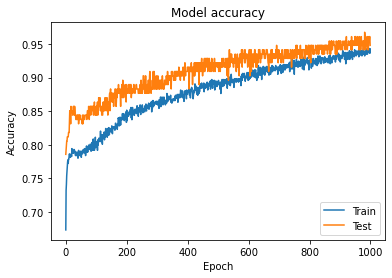

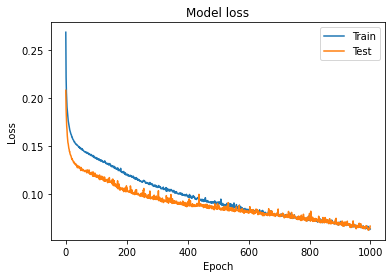

In [43]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

In [11]:
#CNN: 2 convolution layer

from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from keras.optimizers import SGD
from keras import regularizers
import keras
from sklearn.model_selection import cross_val_score

model_cnn = Sequential()

model_cnn.add(Conv2D(4, kernel_size=(2,2), activation='tanh', input_shape=(4,2,1)))
model_cnn.add(Conv2D(4, kernel_size=(2,1), activation='tanh'))
model_cnn.add(Flatten())

model_cnn.add(Dense(1, kernel_regularizer=regularizers.l2(0.02), activation='sigmoid'))

model_cnn.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

model_cnn.fit(X, y, batch_size=20, epochs=1000)
loss, accuracy = model_cnn.evaluate(X_test, y_test, batch_size=None, verbose=1)
print("Test Accuracy: {:.4f}".format(accuracy))

Epoch 1/1000
39/39 [==============================] - 0s 10ms/step - loss: 0.2560 - accuracy: 0.6289
Epoch 2/1000
39/39 [==============================] - 1s 13ms/step - loss: 0.2393 - accuracy: 0.6888
Epoch 3/1000
39/39 [==============================] - 0s 12ms/step - loss: 0.2271 - accuracy: 0.7135
Epoch 4/1000
39/39 [==============================] - 0s 10ms/step - loss: 0.2180 - accuracy: 0.7070
Epoch 5/1000
39/39 [==============================] - 0s 11ms/step - loss: 0.2110 - accuracy: 0.7266
Epoch 6/1000
39/39 [==============================] - 0s 10ms/step - loss: 0.2057 - accuracy: 0.7292
Epoch 7/1000
39/39 [==============================] - 0s 11ms/step - loss: 0.2011 - accuracy: 0.7448
Epoch 8/1000
39/39 [==============================] - 1s 13ms/step - loss: 0.1976 - accuracy: 0.7461
Epoch 9/1000
39/39 [==============================] - 0s 12ms/step - loss: 0.1945 - accuracy: 0.7474
Epoch 10/1000
39/39 [==============================] - 0s 10ms/step - loss: 0.1920 - accura

39/39 [==============================] - 0s 9ms/step - loss: 0.1642 - accuracy: 0.7865
Epoch 159/1000
39/39 [==============================] - 0s 10ms/step - loss: 0.1642 - accuracy: 0.7865
Epoch 160/1000
39/39 [==============================] - 0s 11ms/step - loss: 0.1641 - accuracy: 0.7878
Epoch 161/1000
39/39 [==============================] - 0s 9ms/step - loss: 0.1640 - accuracy: 0.7878
Epoch 162/1000
39/39 [==============================] - 0s 10ms/step - loss: 0.1641 - accuracy: 0.7865
Epoch 163/1000
39/39 [==============================] - 0s 9ms/step - loss: 0.1640 - accuracy: 0.7878
Epoch 164/1000
39/39 [==============================] - 1s 13ms/step - loss: 0.1641 - accuracy: 0.7904 0s - loss: 0.1617 - accuracy
Epoch 165/1000
39/39 [==============================] - 0s 9ms/step - loss: 0.1639 - accuracy: 0.7904
Epoch 166/1000
39/39 [==============================] - 1s 14ms/step - loss: 0.1640 - accuracy: 0.7904
Epoch 167/1000
39/39 [==============================] - 1s 15ms

39/39 [==============================] - 0s 9ms/step - loss: 0.1608 - accuracy: 0.7904
Epoch 312/1000
39/39 [==============================] - 0s 13ms/step - loss: 0.1607 - accuracy: 0.7917
Epoch 313/1000
39/39 [==============================] - 0s 9ms/step - loss: 0.1607 - accuracy: 0.7969
Epoch 314/1000
39/39 [==============================] - 0s 9ms/step - loss: 0.1607 - accuracy: 0.7956
Epoch 315/1000
39/39 [==============================] - 0s 11ms/step - loss: 0.1608 - accuracy: 0.7956
Epoch 316/1000
39/39 [==============================] - 0s 11ms/step - loss: 0.1607 - accuracy: 0.7982
Epoch 317/1000
39/39 [==============================] - 1s 13ms/step - loss: 0.1607 - accuracy: 0.7969
Epoch 318/1000
39/39 [==============================] - 0s 8ms/step - loss: 0.1607 - accuracy: 0.7969
Epoch 319/1000
39/39 [==============================] - 0s 10ms/step - loss: 0.1606 - accuracy: 0.7943
Epoch 320/1000
39/39 [==============================] - 0s 11ms/step - loss: 0.1606 - accura

Epoch 467/1000
39/39 [==============================] - 0s 11ms/step - loss: 0.1586 - accuracy: 0.7956
Epoch 468/1000
39/39 [==============================] - 0s 8ms/step - loss: 0.1586 - accuracy: 0.7930
Epoch 469/1000
39/39 [==============================] - 0s 8ms/step - loss: 0.1586 - accuracy: 0.7943
Epoch 470/1000
39/39 [==============================] - 0s 11ms/step - loss: 0.1585 - accuracy: 0.7943
Epoch 471/1000
39/39 [==============================] - 0s 10ms/step - loss: 0.1586 - accuracy: 0.7956
Epoch 472/1000
39/39 [==============================] - 0s 11ms/step - loss: 0.1585 - accuracy: 0.7956
Epoch 473/1000
39/39 [==============================] - 0s 12ms/step - loss: 0.1585 - accuracy: 0.7969
Epoch 474/1000
39/39 [==============================] - 0s 11ms/step - loss: 0.1584 - accuracy: 0.7969
Epoch 475/1000
39/39 [==============================] - 0s 11ms/step - loss: 0.1584 - accuracy: 0.7969
Epoch 476/1000
39/39 [==============================] - 0s 9ms/step - loss:

39/39 [==============================] - 0s 10ms/step - loss: 0.1569 - accuracy: 0.7982
Epoch 623/1000
39/39 [==============================] - 0s 9ms/step - loss: 0.1567 - accuracy: 0.7969
Epoch 624/1000
39/39 [==============================] - 0s 9ms/step - loss: 0.1567 - accuracy: 0.7982
Epoch 625/1000
39/39 [==============================] - 0s 10ms/step - loss: 0.1568 - accuracy: 0.7982
Epoch 626/1000
39/39 [==============================] - 1s 13ms/step - loss: 0.1567 - accuracy: 0.7995
Epoch 627/1000
39/39 [==============================] - 0s 10ms/step - loss: 0.1567 - accuracy: 0.7982
Epoch 628/1000
39/39 [==============================] - 0s 11ms/step - loss: 0.1567 - accuracy: 0.7969
Epoch 629/1000
39/39 [==============================] - 0s 12ms/step - loss: 0.1567 - accuracy: 0.7995
Epoch 630/1000
39/39 [==============================] - 0s 10ms/step - loss: 0.1567 - accuracy: 0.7982
Epoch 631/1000
39/39 [==============================] - 0s 10ms/step - loss: 0.1566 - accu

Epoch 701/1000
39/39 [==============================] - 0s 8ms/step - loss: 0.1558 - accuracy: 0.7943
Epoch 702/1000
39/39 [==============================] - 0s 12ms/step - loss: 0.1558 - accuracy: 0.7943
Epoch 703/1000
39/39 [==============================] - 0s 9ms/step - loss: 0.1558 - accuracy: 0.7982
Epoch 704/1000
39/39 [==============================] - 0s 10ms/step - loss: 0.1558 - accuracy: 0.7982
Epoch 705/1000
39/39 [==============================] - 0s 12ms/step - loss: 0.1557 - accuracy: 0.7956
Epoch 706/1000
39/39 [==============================] - 0s 11ms/step - loss: 0.1558 - accuracy: 0.7969
Epoch 707/1000
39/39 [==============================] - 0s 11ms/step - loss: 0.1557 - accuracy: 0.8008
Epoch 708/1000
39/39 [==============================] - 0s 12ms/step - loss: 0.1557 - accuracy: 0.7982
Epoch 709/1000
39/39 [==============================] - 0s 11ms/step - loss: 0.1558 - accuracy: 0.7982
Epoch 710/1000
39/39 [==============================] - 0s 10ms/step - loss

39/39 [==============================] - 0s 13ms/step - loss: 0.1545 - accuracy: 0.7995
Epoch 857/1000
39/39 [==============================] - 0s 9ms/step - loss: 0.1545 - accuracy: 0.7995
Epoch 858/1000
39/39 [==============================] - 0s 9ms/step - loss: 0.1545 - accuracy: 0.7995
Epoch 859/1000
39/39 [==============================] - 0s 11ms/step - loss: 0.1545 - accuracy: 0.7982
Epoch 860/1000
39/39 [==============================] - 0s 9ms/step - loss: 0.1546 - accuracy: 0.7969
Epoch 861/1000
39/39 [==============================] - 0s 9ms/step - loss: 0.1545 - accuracy: 0.7982
Epoch 862/1000
39/39 [==============================] - 0s 12ms/step - loss: 0.1545 - accuracy: 0.7982
Epoch 863/1000
39/39 [==============================] - 0s 12ms/step - loss: 0.1545 - accuracy: 0.7982
Epoch 864/1000
39/39 [==============================] - 0s 11ms/step - loss: 0.1545 - accuracy: 0.7943
Epoch 865/1000
39/39 [==============================] - 0s 12ms/step - loss: 0.1545 - accura

In [12]:
#CNN: 1 convolution layer - 1 Pooling - MLP 

from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from keras import regularizers
import keras
from sklearn.model_selection import cross_val_score

model_cnn = Sequential()
model_cnn.add(Conv2D(10, kernel_size=(2,2), activation='relu', input_shape=(4,2,1), data_format = 'channels_last'))
model_cnn.add(MaxPooling2D(pool_size=(2,2), padding='same'))
model_cnn.add(Flatten())
model_cnn.add(Dense(26, input_dim=26, kernel_regularizer=regularizers.l2(0.04), activation='relu'))
model_cnn.add(Dense(1, kernel_regularizer=regularizers.l2(0.02), activation='relu'))
model_cnn.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
model_cnn.fit(X, y, batch_size=20, epochs=1500)
loss, accuracy = model_cnn.evaluate(X_test, y_test, batch_size=None, verbose=1)
print("Test Accuracy: {:.4f}".format(accuracy))

Epoch 1/1500
39/39 [==============================] - 0s 7ms/step - loss: 1.1394 - accuracy: 0.6549
Epoch 2/1500
39/39 [==============================] - 0s 10ms/step - loss: 0.8452 - accuracy: 0.6510
Epoch 3/1500
39/39 [==============================] - 0s 7ms/step - loss: 0.6520 - accuracy: 0.7005
Epoch 4/1500
39/39 [==============================] - 0s 7ms/step - loss: 0.5339 - accuracy: 0.7292: 0s - loss: 0.5646 - accuracy
Epoch 5/1500
39/39 [==============================] - 0s 9ms/step - loss: 0.4455 - accuracy: 0.7448
Epoch 6/1500
39/39 [==============================] - 0s 9ms/step - loss: 0.3804 - accuracy: 0.7396: 0s - loss: 0.3994 - accuracy
Epoch 7/1500
39/39 [==============================] - 0s 11ms/step - loss: 0.3319 - accuracy: 0.7448
Epoch 8/1500
39/39 [==============================] - 0s 9ms/step - loss: 0.2974 - accuracy: 0.7357
Epoch 9/1500
39/39 [==============================] - 0s 8ms/step - loss: 0.2700 - accuracy: 0.7448
Epoch 10/1500
39/39 [=================

39/39 [==============================] - 0s 11ms/step - loss: 0.1682 - accuracy: 0.7760
Epoch 158/1500
39/39 [==============================] - 0s 10ms/step - loss: 0.1681 - accuracy: 0.7786
Epoch 159/1500
39/39 [==============================] - 0s 10ms/step - loss: 0.1679 - accuracy: 0.7799
Epoch 160/1500
39/39 [==============================] - 0s 12ms/step - loss: 0.1677 - accuracy: 0.7839
Epoch 161/1500
39/39 [==============================] - 0s 9ms/step - loss: 0.1683 - accuracy: 0.7799
Epoch 162/1500
39/39 [==============================] - 0s 11ms/step - loss: 0.1678 - accuracy: 0.7760
Epoch 163/1500
39/39 [==============================] - 0s 11ms/step - loss: 0.1684 - accuracy: 0.7839
Epoch 164/1500
39/39 [==============================] - 0s 9ms/step - loss: 0.1685 - accuracy: 0.7799: 0s - loss: 0.1599 - accuracy
Epoch 165/1500
39/39 [==============================] - 0s 10ms/step - loss: 0.1680 - accuracy: 0.7773
Epoch 166/1500
39/39 [==============================] - 0s 8

39/39 [==============================] - 0s 9ms/step - loss: 0.1609 - accuracy: 0.7878
Epoch 315/1500
39/39 [==============================] - 0s 8ms/step - loss: 0.1609 - accuracy: 0.7826
Epoch 316/1500
39/39 [==============================] - 0s 8ms/step - loss: 0.1616 - accuracy: 0.7852
Epoch 317/1500
39/39 [==============================] - 0s 11ms/step - loss: 0.1604 - accuracy: 0.7786
Epoch 318/1500
39/39 [==============================] - 0s 8ms/step - loss: 0.1617 - accuracy: 0.7865
Epoch 319/1500
39/39 [==============================] - 0s 12ms/step - loss: 0.1604 - accuracy: 0.7865 0s - loss: 0.1363 - accura
Epoch 320/1500
39/39 [==============================] - 0s 10ms/step - loss: 0.1636 - accuracy: 0.7786 0s - loss: 0.1617 - accuracy: 0.78
Epoch 321/1500
39/39 [==============================] - 0s 10ms/step - loss: 0.1617 - accuracy: 0.7891
Epoch 322/1500
39/39 [==============================] - 0s 12ms/step - loss: 0.1615 - accuracy: 0.7799
Epoch 323/1500
39/39 [========

39/39 [==============================] - 0s 9ms/step - loss: 0.1572 - accuracy: 0.7839
Epoch 471/1500
39/39 [==============================] - 0s 9ms/step - loss: 0.1585 - accuracy: 0.7799
Epoch 472/1500
39/39 [==============================] - 0s 10ms/step - loss: 0.1580 - accuracy: 0.7878
Epoch 473/1500
39/39 [==============================] - 0s 12ms/step - loss: 0.1579 - accuracy: 0.7865
Epoch 474/1500
39/39 [==============================] - 0s 9ms/step - loss: 0.1587 - accuracy: 0.7891
Epoch 475/1500
39/39 [==============================] - 0s 11ms/step - loss: 0.1574 - accuracy: 0.7773
Epoch 476/1500
39/39 [==============================] - 0s 10ms/step - loss: 0.1579 - accuracy: 0.7878
Epoch 477/1500
39/39 [==============================] - 0s 11ms/step - loss: 0.1598 - accuracy: 0.7878
Epoch 478/1500
39/39 [==============================] - 0s 9ms/step - loss: 0.1576 - accuracy: 0.7943
Epoch 479/1500
39/39 [==============================] - 0s 9ms/step - loss: 0.1591 - accurac

39/39 [==============================] - 0s 8ms/step - loss: 0.1582 - accuracy: 0.7930
Epoch 550/1500
39/39 [==============================] - 0s 7ms/step - loss: 0.1556 - accuracy: 0.7930
Epoch 551/1500
39/39 [==============================] - 0s 10ms/step - loss: 0.1576 - accuracy: 0.7852
Epoch 552/1500
39/39 [==============================] - 0s 11ms/step - loss: 0.1569 - accuracy: 0.7865
Epoch 553/1500
39/39 [==============================] - 0s 10ms/step - loss: 0.1567 - accuracy: 0.7852
Epoch 554/1500
39/39 [==============================] - 0s 9ms/step - loss: 0.1570 - accuracy: 0.7904
Epoch 555/1500
39/39 [==============================] - ETA: 0s - loss: 0.1556 - accuracy: 0.79 - 0s 10ms/step - loss: 0.1565 - accuracy: 0.7930
Epoch 556/1500
39/39 [==============================] - 0s 9ms/step - loss: 0.1561 - accuracy: 0.7917
Epoch 557/1500
39/39 [==============================] - 0s 10ms/step - loss: 0.1562 - accuracy: 0.7943
Epoch 558/1500
39/39 [============================

39/39 [==============================] - 0s 10ms/step - loss: 0.1560 - accuracy: 0.7956
Epoch 707/1500
39/39 [==============================] - 0s 11ms/step - loss: 0.1545 - accuracy: 0.7917 0s - loss: 0.1583 - accuracy
Epoch 708/1500
39/39 [==============================] - 0s 13ms/step - loss: 0.1541 - accuracy: 0.7943 0s - loss: 0.1456 - accuracy
Epoch 709/1500
39/39 [==============================] - 0s 11ms/step - loss: 0.1532 - accuracy: 0.7904
Epoch 710/1500
39/39 [==============================] - 0s 8ms/step - loss: 0.1532 - accuracy: 0.7891
Epoch 711/1500
39/39 [==============================] - 0s 11ms/step - loss: 0.1538 - accuracy: 0.7904
Epoch 712/1500
39/39 [==============================] - 0s 9ms/step - loss: 0.1527 - accuracy: 0.7956
Epoch 713/1500
39/39 [==============================] - 0s 11ms/step - loss: 0.1540 - accuracy: 0.7891
Epoch 714/1500
39/39 [==============================] - 0s 11ms/step - loss: 0.1524 - accuracy: 0.8008
Epoch 715/1500
39/39 [==========

39/39 [==============================] - 0s 10ms/step - loss: 0.1519 - accuracy: 0.7930
Epoch 864/1500
39/39 [==============================] - 0s 9ms/step - loss: 0.1512 - accuracy: 0.8047
Epoch 865/1500
39/39 [==============================] - 0s 9ms/step - loss: 0.1516 - accuracy: 0.7969
Epoch 866/1500
39/39 [==============================] - 0s 9ms/step - loss: 0.1504 - accuracy: 0.7995
Epoch 867/1500
39/39 [==============================] - 0s 8ms/step - loss: 0.1513 - accuracy: 0.7904
Epoch 868/1500
39/39 [==============================] - 0s 11ms/step - loss: 0.1516 - accuracy: 0.7995
Epoch 869/1500
39/39 [==============================] - 0s 9ms/step - loss: 0.1539 - accuracy: 0.7865
Epoch 870/1500
39/39 [==============================] - 0s 9ms/step - loss: 0.1516 - accuracy: 0.7982
Epoch 871/1500
39/39 [==============================] - 0s 10ms/step - loss: 0.1524 - accuracy: 0.7904
Epoch 872/1500
39/39 [==============================] - 0s 8ms/step - loss: 0.1517 - accuracy:

39/39 [==============================] - 0s 10ms/step - loss: 0.1493 - accuracy: 0.7995
Epoch 1022/1500
39/39 [==============================] - 0s 10ms/step - loss: 0.1493 - accuracy: 0.7943
Epoch 1023/1500
39/39 [==============================] - 0s 9ms/step - loss: 0.1515 - accuracy: 0.7891
Epoch 1024/1500
39/39 [==============================] - 0s 9ms/step - loss: 0.1512 - accuracy: 0.7956
Epoch 1025/1500
39/39 [==============================] - 0s 9ms/step - loss: 0.1496 - accuracy: 0.8073
Epoch 1026/1500
39/39 [==============================] - 0s 10ms/step - loss: 0.1497 - accuracy: 0.7956
Epoch 1027/1500
39/39 [==============================] - 0s 9ms/step - loss: 0.1496 - accuracy: 0.7969
Epoch 1028/1500
39/39 [==============================] - 0s 11ms/step - loss: 0.1485 - accuracy: 0.8008
Epoch 1029/1500
39/39 [==============================] - 0s 13ms/step - loss: 0.1479 - accuracy: 0.8034
Epoch 1030/1500
39/39 [==============================] - 0s 9ms/step - loss: 0.1502 

39/39 [==============================] - 0s 10ms/step - loss: 0.1488 - accuracy: 0.7956
Epoch 1176/1500
39/39 [==============================] - 0s 10ms/step - loss: 0.1481 - accuracy: 0.8047
Epoch 1177/1500
39/39 [==============================] - 0s 9ms/step - loss: 0.1480 - accuracy: 0.7995
Epoch 1178/1500
39/39 [==============================] - 0s 11ms/step - loss: 0.1478 - accuracy: 0.7982
Epoch 1179/1500
39/39 [==============================] - 0s 12ms/step - loss: 0.1509 - accuracy: 0.8112
Epoch 1180/1500
39/39 [==============================] - 0s 10ms/step - loss: 0.1502 - accuracy: 0.8008
Epoch 1181/1500
39/39 [==============================] - 0s 10ms/step - loss: 0.1480 - accuracy: 0.8034
Epoch 1182/1500
39/39 [==============================] - 0s 12ms/step - loss: 0.1497 - accuracy: 0.8021
Epoch 1183/1500
39/39 [==============================] - 0s 9ms/step - loss: 0.1484 - accuracy: 0.7943
Epoch 1184/1500
39/39 [==============================] - 0s 8ms/step - loss: 0.147

39/39 [==============================] - 0s 7ms/step - loss: 0.1468 - accuracy: 0.8021
Epoch 1330/1500
39/39 [==============================] - 0s 12ms/step - loss: 0.1478 - accuracy: 0.7956
Epoch 1331/1500
39/39 [==============================] - 0s 9ms/step - loss: 0.1470 - accuracy: 0.7956
Epoch 1332/1500
39/39 [==============================] - 0s 10ms/step - loss: 0.1482 - accuracy: 0.7982
Epoch 1333/1500
39/39 [==============================] - ETA: 0s - loss: 0.1483 - accuracy: 0.79 - 0s 13ms/step - loss: 0.1462 - accuracy: 0.8008
Epoch 1334/1500
39/39 [==============================] - 0s 11ms/step - loss: 0.1485 - accuracy: 0.7878
Epoch 1335/1500
39/39 [==============================] - 0s 9ms/step - loss: 0.1471 - accuracy: 0.8060
Epoch 1336/1500
39/39 [==============================] - 0s 12ms/step - loss: 0.1478 - accuracy: 0.8008
Epoch 1337/1500
39/39 [==============================] - ETA: 0s - loss: 0.1470 - accuracy: 0.80 - 0s 11ms/step - loss: 0.1485 - accuracy: 0.8021

39/39 [==============================] - 0s 8ms/step - loss: 0.1454 - accuracy: 0.8008
Epoch 1485/1500
39/39 [==============================] - 0s 11ms/step - loss: 0.1466 - accuracy: 0.7930
Epoch 1486/1500
39/39 [==============================] - 0s 9ms/step - loss: 0.1449 - accuracy: 0.8086
Epoch 1487/1500
39/39 [==============================] - 0s 9ms/step - loss: 0.1454 - accuracy: 0.8021: 0s - loss: 0.1574 - accuracy
Epoch 1488/1500
39/39 [==============================] - 0s 10ms/step - loss: 0.1461 - accuracy: 0.8008
Epoch 1489/1500
39/39 [==============================] - 0s 8ms/step - loss: 0.1457 - accuracy: 0.8034
Epoch 1490/1500
39/39 [==============================] - 0s 9ms/step - loss: 0.1452 - accuracy: 0.8060
Epoch 1491/1500
39/39 [==============================] - 0s 10ms/step - loss: 0.1455 - accuracy: 0.8021
Epoch 1492/1500
39/39 [==============================] - 0s 12ms/step - loss: 0.1458 - accuracy: 0.8021
Epoch 1493/1500
39/39 [==============================] 

In [13]:
model_cnn.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 3, 1, 10)          50        
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 2, 1, 10)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 20)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 26)                546       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 27        
Total params: 623
Trainable params: 623
Non-trainable params: 0
_________________________________________________________________


In [15]:
#CNN: 2 convolution layer

from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from keras.optimizers import SGD
from keras import regularizers
import keras
from sklearn.model_selection import cross_val_score

model_cnn = Sequential()
# convolution
model_cnn.add(Conv2D(4, kernel_size=(2,2), activation='tanh', input_shape=(4,2,1), data_format = 'channels_last'))
model_cnn.add(Conv2D(4, kernel_size=(2,1), activation='tanh', data_format = 'channels_last'))
# flattening
model_cnn.add(Flatten())#partie de MLP
# full connection
model_cnn.add(Dense(1, kernel_regularizer=regularizers.l2(0.02), activation='relu'))
# compilinf CNN
model_cnn.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
# train a model
model_cnn.fit(X, y, batch_size=32, epochs=2000)
loss, accuracy = model_cnn.evaluate(X_test, y_test, batch_size=None, verbose=1)
print("Test Accuracy: {:.4f}".format(accuracy))

Epoch 1/2000
24/24 [==============================] - 0s 9ms/step - loss: 0.3582 - accuracy: 0.6237
Epoch 2/2000
24/24 [==============================] - 0s 7ms/step - loss: 0.3417 - accuracy: 0.6393
Epoch 3/2000
24/24 [==============================] - 0s 7ms/step - loss: 0.3292 - accuracy: 0.6432
Epoch 4/2000
24/24 [==============================] - 0s 7ms/step - loss: 0.3186 - accuracy: 0.6484
Epoch 5/2000
24/24 [==============================] - 0s 8ms/step - loss: 0.3084 - accuracy: 0.6497
Epoch 6/2000
24/24 [==============================] - 0s 9ms/step - loss: 0.2964 - accuracy: 0.6393
Epoch 7/2000
24/24 [==============================] - 0s 10ms/step - loss: 0.2826 - accuracy: 0.6536
Epoch 8/2000
24/24 [==============================] - 0s 10ms/step - loss: 0.2673 - accuracy: 0.6576
Epoch 9/2000
24/24 [==============================] - 0s 9ms/step - loss: 0.2506 - accuracy: 0.6628
Epoch 10/2000
24/24 [==============================] - 0s 8ms/step - loss: 0.2304 - accuracy: 0.69

24/24 [==============================] - 0s 9ms/step - loss: 0.1547 - accuracy: 0.7734
Epoch 161/2000
24/24 [==============================] - 0s 7ms/step - loss: 0.1547 - accuracy: 0.7734
Epoch 162/2000
24/24 [==============================] - 0s 8ms/step - loss: 0.1544 - accuracy: 0.7708: 0s - loss: 0.1537 - accuracy: 0.
Epoch 163/2000
24/24 [==============================] - 0s 9ms/step - loss: 0.1544 - accuracy: 0.7695
Epoch 164/2000
24/24 [==============================] - 0s 13ms/step - loss: 0.1544 - accuracy: 0.7682
Epoch 165/2000
24/24 [==============================] - 0s 9ms/step - loss: 0.1545 - accuracy: 0.7695
Epoch 166/2000
24/24 [==============================] - 0s 10ms/step - loss: 0.1544 - accuracy: 0.7721
Epoch 167/2000
24/24 [==============================] - 0s 10ms/step - loss: 0.1543 - accuracy: 0.7695
Epoch 168/2000
24/24 [==============================] - 0s 8ms/step - loss: 0.1541 - accuracy: 0.7695
Epoch 169/2000
24/24 [==============================] - 0s 7

24/24 [==============================] - 0s 11ms/step - loss: 0.1498 - accuracy: 0.7839
Epoch 319/2000
24/24 [==============================] - 0s 13ms/step - loss: 0.1497 - accuracy: 0.7865
Epoch 320/2000
24/24 [==============================] - 0s 9ms/step - loss: 0.1500 - accuracy: 0.7826
Epoch 321/2000
24/24 [==============================] - 0s 9ms/step - loss: 0.1498 - accuracy: 0.7865: 0s - loss: 0.1585 - accuracy: 0.
Epoch 322/2000
24/24 [==============================] - 0s 9ms/step - loss: 0.1498 - accuracy: 0.7812
Epoch 323/2000
24/24 [==============================] - 0s 10ms/step - loss: 0.1498 - accuracy: 0.7839
Epoch 324/2000
24/24 [==============================] - 0s 10ms/step - loss: 0.1497 - accuracy: 0.7865
Epoch 325/2000
24/24 [==============================] - 0s 8ms/step - loss: 0.1497 - accuracy: 0.7865
Epoch 326/2000
24/24 [==============================] - 0s 12ms/step - loss: 0.1497 - accuracy: 0.7826
Epoch 327/2000
24/24 [==============================] - 0s

24/24 [==============================] - 0s 7ms/step - loss: 0.1463 - accuracy: 0.7839
Epoch 475/2000
24/24 [==============================] - 0s 10ms/step - loss: 0.1458 - accuracy: 0.7826 0s - loss: 0.1460 - accuracy: 0.
Epoch 476/2000
24/24 [==============================] - 0s 10ms/step - loss: 0.1461 - accuracy: 0.7839 0s - loss: 0.1546 - accuracy: 
Epoch 477/2000
24/24 [==============================] - ETA: 0s - loss: 0.1521 - accuracy: 0.77 - 0s 8ms/step - loss: 0.1460 - accuracy: 0.7852
Epoch 478/2000
24/24 [==============================] - 0s 6ms/step - loss: 0.1459 - accuracy: 0.7865
Epoch 479/2000
24/24 [==============================] - 0s 11ms/step - loss: 0.1460 - accuracy: 0.7826
Epoch 480/2000
24/24 [==============================] - 0s 9ms/step - loss: 0.1459 - accuracy: 0.7878
Epoch 481/2000
24/24 [==============================] - 0s 8ms/step - loss: 0.1459 - accuracy: 0.7839
Epoch 482/2000
24/24 [==============================] - 0s 8ms/step - loss: 0.1460 - accur

24/24 [==============================] - 0s 7ms/step - loss: 0.1426 - accuracy: 0.7943
Epoch 630/2000
24/24 [==============================] - 0s 9ms/step - loss: 0.1426 - accuracy: 0.7956
Epoch 631/2000
24/24 [==============================] - 0s 11ms/step - loss: 0.1427 - accuracy: 0.7943
Epoch 632/2000
24/24 [==============================] - 0s 7ms/step - loss: 0.1425 - accuracy: 0.7943
Epoch 633/2000
24/24 [==============================] - 0s 10ms/step - loss: 0.1426 - accuracy: 0.7917
Epoch 634/2000
24/24 [==============================] - 0s 10ms/step - loss: 0.1426 - accuracy: 0.7930
Epoch 635/2000
24/24 [==============================] - 0s 8ms/step - loss: 0.1429 - accuracy: 0.7904
Epoch 636/2000
24/24 [==============================] - 0s 12ms/step - loss: 0.1426 - accuracy: 0.7956 0s - loss: 0.1420 - accuracy: 0.
Epoch 637/2000
24/24 [==============================] - 0s 10ms/step - loss: 0.1424 - accuracy: 0.7943
Epoch 638/2000
24/24 [==============================] - 0s 

24/24 [==============================] - 0s 6ms/step - loss: 0.1416 - accuracy: 0.7956
Epoch 708/2000
24/24 [==============================] - 0s 8ms/step - loss: 0.1415 - accuracy: 0.7969
Epoch 709/2000
24/24 [==============================] - 0s 9ms/step - loss: 0.1415 - accuracy: 0.8008
Epoch 710/2000
24/24 [==============================] - 0s 11ms/step - loss: 0.1415 - accuracy: 0.7969
Epoch 711/2000
24/24 [==============================] - 0s 9ms/step - loss: 0.1414 - accuracy: 0.7982
Epoch 712/2000
24/24 [==============================] - 0s 8ms/step - loss: 0.1413 - accuracy: 0.7956
Epoch 713/2000
24/24 [==============================] - 0s 8ms/step - loss: 0.1411 - accuracy: 0.7956
Epoch 714/2000
24/24 [==============================] - 0s 12ms/step - loss: 0.1413 - accuracy: 0.7982
Epoch 715/2000
24/24 [==============================] - 0s 9ms/step - loss: 0.1413 - accuracy: 0.7982
Epoch 716/2000
24/24 [==============================] - 0s 12ms/step - loss: 0.1415 - accuracy:

24/24 [==============================] - 0s 8ms/step - loss: 0.1393 - accuracy: 0.8047
Epoch 861/2000
24/24 [==============================] - 0s 10ms/step - loss: 0.1393 - accuracy: 0.8021
Epoch 862/2000
24/24 [==============================] - 0s 8ms/step - loss: 0.1392 - accuracy: 0.8008
Epoch 863/2000
24/24 [==============================] - 0s 7ms/step - loss: 0.1393 - accuracy: 0.7982
Epoch 864/2000
24/24 [==============================] - 0s 10ms/step - loss: 0.1393 - accuracy: 0.8021
Epoch 865/2000
24/24 [==============================] - 0s 8ms/step - loss: 0.1391 - accuracy: 0.8034
Epoch 866/2000
24/24 [==============================] - 0s 12ms/step - loss: 0.1395 - accuracy: 0.7995
Epoch 867/2000
24/24 [==============================] - 0s 11ms/step - loss: 0.1392 - accuracy: 0.7995
Epoch 868/2000
24/24 [==============================] - 0s 11ms/step - loss: 0.1391 - accuracy: 0.8034
Epoch 869/2000
24/24 [==============================] - 0s 6ms/step - loss: 0.1393 - accurac

24/24 [==============================] - 0s 13ms/step - loss: 0.1384 - accuracy: 0.8021
Epoch 940/2000
24/24 [==============================] - 0s 8ms/step - loss: 0.1381 - accuracy: 0.8021
Epoch 941/2000
24/24 [==============================] - 0s 9ms/step - loss: 0.1386 - accuracy: 0.8060
Epoch 942/2000
24/24 [==============================] - 0s 10ms/step - loss: 0.1384 - accuracy: 0.8034
Epoch 943/2000
24/24 [==============================] - 0s 13ms/step - loss: 0.1383 - accuracy: 0.8008
Epoch 944/2000
24/24 [==============================] - 0s 9ms/step - loss: 0.1381 - accuracy: 0.7982
Epoch 945/2000
24/24 [==============================] - ETA: 0s - loss: 0.1383 - accuracy: 0.80 - 0s 8ms/step - loss: 0.1384 - accuracy: 0.8047
Epoch 946/2000
24/24 [==============================] - 0s 10ms/step - loss: 0.1384 - accuracy: 0.7995
Epoch 947/2000
24/24 [==============================] - 0s 14ms/step - loss: 0.1383 - accuracy: 0.8008
Epoch 948/2000
24/24 [============================

24/24 [==============================] - 0s 8ms/step - loss: 0.1366 - accuracy: 0.8112
Epoch 1097/2000
24/24 [==============================] - 0s 7ms/step - loss: 0.1367 - accuracy: 0.8125
Epoch 1098/2000
24/24 [==============================] - 0s 7ms/step - loss: 0.1368 - accuracy: 0.8099
Epoch 1099/2000
24/24 [==============================] - 0s 6ms/step - loss: 0.1367 - accuracy: 0.8099
Epoch 1100/2000
24/24 [==============================] - 0s 6ms/step - loss: 0.1365 - accuracy: 0.8125
Epoch 1101/2000
24/24 [==============================] - 0s 9ms/step - loss: 0.1366 - accuracy: 0.8125
Epoch 1102/2000
24/24 [==============================] - 0s 8ms/step - loss: 0.1365 - accuracy: 0.8138
Epoch 1103/2000
24/24 [==============================] - 0s 6ms/step - loss: 0.1366 - accuracy: 0.8112
Epoch 1104/2000
24/24 [==============================] - 0s 7ms/step - loss: 0.1366 - accuracy: 0.8086
Epoch 1105/2000
24/24 [==============================] - 0s 7ms/step - loss: 0.1365 - acc

24/24 [==============================] - 0s 8ms/step - loss: 0.1354 - accuracy: 0.8112
Epoch 1254/2000
24/24 [==============================] - 0s 8ms/step - loss: 0.1352 - accuracy: 0.8099
Epoch 1255/2000
24/24 [==============================] - 0s 7ms/step - loss: 0.1351 - accuracy: 0.8112
Epoch 1256/2000
24/24 [==============================] - 0s 7ms/step - loss: 0.1350 - accuracy: 0.8112
Epoch 1257/2000
24/24 [==============================] - 0s 6ms/step - loss: 0.1350 - accuracy: 0.8112
Epoch 1258/2000
24/24 [==============================] - 0s 6ms/step - loss: 0.1351 - accuracy: 0.8073
Epoch 1259/2000
24/24 [==============================] - 0s 7ms/step - loss: 0.1351 - accuracy: 0.8099
Epoch 1260/2000
24/24 [==============================] - 0s 5ms/step - loss: 0.1350 - accuracy: 0.8086
Epoch 1261/2000
24/24 [==============================] - 0s 6ms/step - loss: 0.1351 - accuracy: 0.8112
Epoch 1262/2000
24/24 [==============================] - 0s 6ms/step - loss: 0.1351 - acc

24/24 [==============================] - 0s 6ms/step - loss: 0.1339 - accuracy: 0.8190
Epoch 1411/2000
24/24 [==============================] - 0s 8ms/step - loss: 0.1337 - accuracy: 0.8164
Epoch 1412/2000
24/24 [==============================] - 0s 7ms/step - loss: 0.1337 - accuracy: 0.8151
Epoch 1413/2000
24/24 [==============================] - ETA: 0s - loss: 0.1324 - accuracy: 0.81 - 0s 8ms/step - loss: 0.1337 - accuracy: 0.8138
Epoch 1414/2000
24/24 [==============================] - 0s 9ms/step - loss: 0.1337 - accuracy: 0.8151
Epoch 1415/2000
24/24 [==============================] - 0s 6ms/step - loss: 0.1337 - accuracy: 0.8125
Epoch 1416/2000
24/24 [==============================] - 0s 6ms/step - loss: 0.1337 - accuracy: 0.8138
Epoch 1417/2000
24/24 [==============================] - 0s 8ms/step - loss: 0.1338 - accuracy: 0.8138
Epoch 1418/2000
24/24 [==============================] - 0s 8ms/step - loss: 0.1337 - accuracy: 0.8164
Epoch 1419/2000
24/24 [========================

24/24 [==============================] - 0s 6ms/step - loss: 0.1328 - accuracy: 0.8177
Epoch 1567/2000
24/24 [==============================] - 0s 6ms/step - loss: 0.1328 - accuracy: 0.8151
Epoch 1568/2000
24/24 [==============================] - ETA: 0s - loss: 0.1372 - accuracy: 0.80 - 0s 6ms/step - loss: 0.1329 - accuracy: 0.8190
Epoch 1569/2000
24/24 [==============================] - 0s 8ms/step - loss: 0.1327 - accuracy: 0.8177
Epoch 1570/2000
24/24 [==============================] - 0s 10ms/step - loss: 0.1326 - accuracy: 0.8151
Epoch 1571/2000
24/24 [==============================] - 0s 9ms/step - loss: 0.1327 - accuracy: 0.8151
Epoch 1572/2000
24/24 [==============================] - 0s 8ms/step - loss: 0.1327 - accuracy: 0.8138
Epoch 1573/2000
24/24 [==============================] - 0s 6ms/step - loss: 0.1327 - accuracy: 0.8151
Epoch 1574/2000
24/24 [==============================] - 0s 7ms/step - loss: 0.1327 - accuracy: 0.8151
Epoch 1575/2000
24/24 [=======================

24/24 [==============================] - 0s 8ms/step - loss: 0.1320 - accuracy: 0.8190
Epoch 1722/2000
24/24 [==============================] - 0s 6ms/step - loss: 0.1322 - accuracy: 0.8177
Epoch 1723/2000
24/24 [==============================] - 0s 6ms/step - loss: 0.1320 - accuracy: 0.8164
Epoch 1724/2000
24/24 [==============================] - 0s 8ms/step - loss: 0.1318 - accuracy: 0.8216
Epoch 1725/2000
24/24 [==============================] - 0s 8ms/step - loss: 0.1318 - accuracy: 0.8190
Epoch 1726/2000
24/24 [==============================] - 0s 6ms/step - loss: 0.1318 - accuracy: 0.8203
Epoch 1727/2000
24/24 [==============================] - 0s 7ms/step - loss: 0.1318 - accuracy: 0.8177
Epoch 1728/2000
24/24 [==============================] - 0s 10ms/step - loss: 0.1318 - accuracy: 0.8177
Epoch 1729/2000
24/24 [==============================] - 0s 6ms/step - loss: 0.1318 - accuracy: 0.8216
Epoch 1730/2000
24/24 [==============================] - 0s 7ms/step - loss: 0.1317 - ac

24/24 [==============================] - 0s 8ms/step - loss: 0.1311 - accuracy: 0.8229
Epoch 1878/2000
24/24 [==============================] - 0s 7ms/step - loss: 0.1311 - accuracy: 0.8255: 0s - loss: 0.1311 - accuracy: 0.82
Epoch 1879/2000
24/24 [==============================] - 0s 7ms/step - loss: 0.1312 - accuracy: 0.8203
Epoch 1880/2000
24/24 [==============================] - 0s 9ms/step - loss: 0.1312 - accuracy: 0.8216
Epoch 1881/2000
24/24 [==============================] - 0s 8ms/step - loss: 0.1311 - accuracy: 0.8216
Epoch 1882/2000
24/24 [==============================] - 0s 6ms/step - loss: 0.1312 - accuracy: 0.8229
Epoch 1883/2000
24/24 [==============================] - 0s 8ms/step - loss: 0.1311 - accuracy: 0.8216
Epoch 1884/2000
24/24 [==============================] - 0s 7ms/step - loss: 0.1313 - accuracy: 0.8177
Epoch 1885/2000
24/24 [==============================] - ETA: 0s - loss: 0.1328 - accuracy: 0.81 - 0s 8ms/step - loss: 0.1311 - accuracy: 0.8203
Epoch 1886/

24/24 [==============================] - 0s 9ms/step - loss: 0.1308 - accuracy: 0.8229
Epoch 1956/2000
24/24 [==============================] - 0s 10ms/step - loss: 0.1308 - accuracy: 0.8242
Epoch 1957/2000
24/24 [==============================] - 0s 6ms/step - loss: 0.1309 - accuracy: 0.8229
Epoch 1958/2000
24/24 [==============================] - 0s 7ms/step - loss: 0.1308 - accuracy: 0.8229
Epoch 1959/2000
24/24 [==============================] - 0s 11ms/step - loss: 0.1308 - accuracy: 0.8216
Epoch 1960/2000
24/24 [==============================] - 0s 8ms/step - loss: 0.1307 - accuracy: 0.8255
Epoch 1961/2000
24/24 [==============================] - 0s 8ms/step - loss: 0.1308 - accuracy: 0.8229
Epoch 1962/2000
24/24 [==============================] - 0s 11ms/step - loss: 0.1309 - accuracy: 0.8229
Epoch 1963/2000
24/24 [==============================] - 0s 10ms/step - loss: 0.1308 - accuracy: 0.8216
Epoch 1964/2000
24/24 [==============================] - 0s 8ms/step - loss: 0.1308 -